In [21]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import copy
import scipy

def f(lmd,c):
    # return scipy.special.expit(-lmd*c)
    y = 1 / (1 + np.exp(-lmd*c))
    return y

def h(err):
    y = 1 / (2 * err + 1)
    return y

def errorLp(p,data_pre,data_real):
    dist = np.linalg.norm(data_pre-data_real,ord=p)/(data_pre.shape[0]*data_pre.shape[1])
    return dist
  
#%%
#返回初始化权重参数   NxN 
def initialize_parameters_he(npop,N):
    parameters = np.zeros((npop,N*N))
    for i in range(npop):
        parameter = np.random.randn(N*(N-1)) * np.sqrt(2.0 / (N*(N-1)))
        lmd = np.random.uniform(0,1,N)
        #lmd = np.array([1]*N)
        parameters[i] = parameter.tolist()+lmd.tolist()
    return parameters
    

def rshape(X,N):
    temp = copy.copy(X)
    param = temp.reshape(N,N) 
    e = np.zeros((N,N))  
    lmd = param[N-1,:]
    for i in range(N):
        num = 0
        for j in range(N):
            if i is not j:
                e[i,j] = param[i,num] 
                num = num + 1
    return e,lmd
    
#jaya学习算法训练FCM参数
def jayaTrain(c_data,c_real,time,N,npop=4):
    X = initialize_parameters_he(npop,N)
#    for n in range(npop):
#        for i in range(N*N):
#            X[n,i] = min(X[:,i]) + np.random.random()*(max(X[:,i])-min(X[:,i]))
    fitness = np.zeros(npop)
    error = np.zeros(npop)
    worst= 0
    best = 0
    error_time = []
    c_pre = np.zeros((c_data.shape[0],c_data.shape[1]))
    for num in range(100):
        for n in range(npop):
            e,lmd = rshape(X[n,:],N)
            for i in range(len(c_data)):
                c_pre[i] = fcm(e,lmd,c_data[i],time)
            #c_pre = fcm(e,lmd,c_data,time)
            #print("c_pre, c_real: %s ,%s" % c_pre.shape, c_real.shape)
            fitness[n] = h(errorLp(2,c_pre,c_real)) 
            error[n] = errorLp(2,c_pre,c_real)
        worst = fitness.tolist().index(min(fitness))
        best = fitness.tolist().index(max(fitness))
        print(worst,best,fitness)
    
        Xx = np.zeros((npop,N*N))
        for n in range(npop):
            Xx[n,:] = X[n,:] + (X[best,:]-np.abs(X[n,:]))*np.random.random()-(X[worst,:]-np.abs(X[n,:]))*np.random.random()
            for i in range(N*N):
                if Xx[n,i] < min(Xx[:,i]):
                    Xx[n,i] = min(Xx[:,i])
                if Xx[n,i] > max(Xx[:,i]):
                    Xx[n,i] = max(Xx[:,i])
            e,lmd = rshape(Xx[n,:],N)
            for i in range(len(c_data)):
                c_pre[i] = fcm(e,lmd,c_data[i],time)
            #c_pre = fcm(e,lmd,c_data,time)
            error2 = errorLp(2,c_pre,c_real)
            if error2 <= error[n]:
                X[n,:] = Xx[n,:]              
        error_time.append(error[best])
    e,lmd = rshape(X[best,:],N)
    return e,lmd,error_time

#模糊认知图递推过程      
def fcm(e,lmd,data,time):
    c_len = len(data)
    data_pre = np.zeros((time+1,c_len))
    data_pre[0] = data
    '''
    for t in range(0,time):
        for i in range(c_len):
            for j in range(c_len):
                if i is not j :
                    data_pre[t+1,i] += e[j,i]*data_pre[t,j]
            data_pre[t+1,i] += data_pre[t,i]
            data_pre[t+1,i] = f(lmd[i],data_pre[t+1,i])
    
    '''
    for t in range(0,time):
        data_pre[t+1] = 
    return data_pre[1:]


In [19]:
#%%
def drawPre(title,preData,realData,dataNum=50):
    plt.title(title)
    plt.plot(range(dataNum), preData, color='green', label='predict');
    plt.plot(range(dataNum), realData, color='red', label='real');
    plt.legend();
    plt.xlabel('time');
    plt.ylabel('value');
    plt.show();        
    
def dataErr(data,label='none'):
    #输出图表
    
    plt.xlabel('time(day)')
    plt.ylabel('lost')
    
    plt.plot(data, label=label)
    
    plt.legend()
    plt.show()


7 0 [0.98643408 0.98613855 0.98618292 0.98620618 0.98629022 0.9863215
 0.98619009 0.98612181]
1 0 [0.98702565 0.98613855 0.98618292 0.98656912 0.98655428 0.98666827
 0.98619009 0.98619604]
6 5 [0.98835559 0.9864518  0.98679318 0.98797578 0.98772432 0.98896417
 0.98619009 0.98619604]
7 5 [0.98870684 0.98776071 0.9878821  0.98870712 0.98839563 0.98896417
 0.98819697 0.98619604]
1 6 [0.98870684 0.98847871 0.98973125 0.98870712 0.98906209 0.98896417
 0.98973455 0.98875089]
1 7 [0.98876453 0.98847871 0.98973125 0.98874077 0.98906209 0.98943509
 0.99029085 0.99047848]
3 7 [0.98876453 0.99028858 0.99008579 0.98874077 0.98967722 0.98943509
 0.99084078 0.99197707]
0 7 [0.98876453 0.99136378 0.99008579 0.99059074 0.98967722 0.99095025
 0.9910529  0.99197707]
4 7 [0.98991147 0.99136378 0.99065464 0.99059074 0.98967722 0.99096403
 0.9910529  0.9923603 ]
4 5 [0.99203719 0.99222157 0.99065464 0.99299056 0.98967722 0.99302002
 0.99276096 0.9923603 ]
2 0 [0.99458276 0.99222157 0.99065464 0.99307879 0.

<ipython-input-21-1abe9627c70c>:11: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-lmd*c))


3 6 [0.99554759 0.99480472 0.99565033 0.99307879 0.99455882 0.99549075
 0.99585262 0.99581759]
3 6 [0.99554759 0.9958413  0.99565033 0.99307879 0.99455882 0.99549075
 0.99585262 0.99581759]
3 6 [0.99554759 0.9958413  0.99565033 0.99307879 0.99455882 0.99549075
 0.99585262 0.99581759]
3 6 [0.99554759 0.9958413  0.99565033 0.9942999  0.99455882 0.99549075
 0.99585262 0.99581759]
4 5 [0.99554759 0.9958413  0.99565033 0.99535681 0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99554759 0.9958413  0.99565033 0.9956168  0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99555438 0.9958413  0.99565033 0.9956168  0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99555438 0.9958413  0.99565033 0.9956168  0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99580112 0.9958413  0.99565033 0.9956168  0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99580112 0.9958413  0.99565033 0.99613296 0.99461239 0.99622643
 0.99585262 0.99581759]
4 5 [0.99580112 0.9958413  0.99565033 0.99613296 0

3 4 [0.98810892 0.98810131 0.98778978 0.98749036 0.98877944 0.98809206
 0.98812813 0.98814951]
3 6 [0.98843358 0.98883229 0.98778978 0.98749036 0.98877944 0.98809206
 0.98941868 0.98814951]
5 6 [0.98920323 0.98883805 0.98879331 0.98869112 0.98877944 0.98809206
 0.98941868 0.98814951]
5 6 [0.98936236 0.98883805 0.98879331 0.98922309 0.98877944 0.98809206
 0.98972847 0.98814951]
5 3 [0.98950198 0.98883805 0.98879331 0.98983385 0.98899639 0.98809206
 0.98972847 0.98901308]
5 3 [0.98950198 0.98883805 0.98902803 0.98983385 0.9895457  0.98809206
 0.98972847 0.98901308]
5 3 [0.98950198 0.9895811  0.98902803 0.99025323 0.9895457  0.98809206
 0.98972847 0.98961371]
5 6 [0.98950198 0.9895811  0.98919603 0.99025323 0.9897224  0.98809206
 0.99033323 0.98961371]
5 6 [0.99008899 0.9895811  0.98928008 0.99025323 0.9897224  0.9890081
 0.99033323 0.98961371]
5 6 [0.99008899 0.9895811  0.98928008 0.99025323 0.98989255 0.98921723
 0.99033323 0.98961371]
5 6 [0.99008899 0.9895811  0.98928008 0.99025323 0.

0 7 [0.99574376 0.99590557 0.99578322 0.99575723 0.9957901  0.99588909
 0.99585211 0.99590849]
0 7 [0.99574376 0.99590557 0.99586835 0.99575723 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99575723 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99578093 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99578093 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99578093 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99578093 0.9957901  0.99588909
 0.99585211 0.99596472]
3 7 [0.99584852 0.99590557 0.99589308 0.99578093 0.99584406 0.99588909
 0.99585211 0.99596472]
0 1 [0.98545033 0.98662385 0.98631083 0.98570853 0.98571443 0.98586899
 0.986536   0.98626163]
0 6 [0.98579108 0.98741015 0.98704415 0.98688547 0.98727508 0.98617996
 0.98764988 0.98652843]
7 2 [0.98673599 0.98741015 0.9882168  0.98690575 0

7 5 [0.99629206 0.99626634 0.99627313 0.99624456 0.996269   0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624456 0.996269   0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624456 0.996269   0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624456 0.996269   0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0.99628315 0.99630553
 0.99626787 0.99617116]
7 5 [0.99629206 0.99626634 0.99627313 0.99624567 0

7 0 [0.99419216 0.9936931  0.99393504 0.99364866 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99364866 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99364866 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99364866 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99364866 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99396438 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99396438 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99396438 0.9939575  0.99363366
 0.9937047  0.99363205]
7 0 [0.99419216 0.9936931  0.99393504 0.99396438 0.9939575  0.99363366
 0.9937047  0.99363205]
5 0 [0.99419216 0.9936931  0.99393504 0.99396438 0.9939575  0.99363366
 0.9937047  0.99404844]
5 0 [0.99419216 0.9936931  0.99393504 0.99396438 0

3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99657459]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.99643363 0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.9964784  0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.9964784  0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
3 6 [0.99651303 0.99655368 0.9964784  0.99637351 0.99665461 0.99657949
 0.99669681 0.99661239]
2 3 [0.99651303 0.99655368 0.9964784  0.99670976 0

2 4 [0.99632415 0.99616054 0.99596203 0.99620058 0.99638905 0.99630161
 0.99603688 0.99613984]
2 4 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99613984]
2 7 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
2 7 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
2 7 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
2 7 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
2 7 [0.99632415 0.99616054 0.99596203 0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
6 7 [0.99632415 0.99616054 0.9961772  0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
6 7 [0.99632415 0.99616054 0.9961772  0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
6 7 [0.99632415 0.99636923 0.9961772  0.99623649 0.99638905 0.99630161
 0.99607941 0.99643433]
2 7 [0.99632415 0.99636923 0.9961772  0.99623649 0

5 3 [0.99122744 0.99299765 0.99152945 0.9933229  0.99230823 0.99111234
 0.99270097 0.99305034]
0 2 [0.99122744 0.99299765 0.99382307 0.9933229  0.99230823 0.99131794
 0.99286316 0.99305034]
0 7 [0.99229619 0.99299765 0.99500629 0.9933229  0.99230823 0.99399543
 0.99397166 0.99554051]
4 7 [0.99378311 0.99299765 0.99532768 0.9933229  0.99230823 0.99399543
 0.99453222 0.99554051]
4 0 [0.99557981 0.99408245 0.99532768 0.99460829 0.99230833 0.99399543
 0.99453222 0.99554051]
4 0 [0.99557981 0.99408245 0.99532768 0.99471162 0.99300096 0.99399882
 0.99453222 0.99555484]
5 3 [0.99557981 0.99408245 0.99584756 0.99609046 0.99501492 0.99399882
 0.99453222 0.99555484]
5 3 [0.99559108 0.99408245 0.99584756 0.99609046 0.99501492 0.99399882
 0.99453222 0.99555484]
1 3 [0.99562728 0.99408245 0.99584756 0.99609046 0.99501492 0.99442241
 0.99453222 0.99581705]
5 3 [0.99562728 0.99570693 0.99584756 0.99609046 0.99501492 0.99442241
 0.99453222 0.99581705]
5 3 [0.99562728 0.99570693 0.99584756 0.99609046 0

5 6 [0.9959694  0.99567417 0.99519883 0.99601233 0.99544423 0.99336862
 0.99603089 0.99597752]
2 6 [0.9959694  0.99567417 0.99519883 0.99601233 0.99544423 0.99576233
 0.99603089 0.99597752]
4 6 [0.9959694  0.99567417 0.99594102 0.99601233 0.99564919 0.99576233
 0.99608489 0.99597752]
4 6 [0.9959694  0.99594462 0.99594102 0.99601233 0.99564919 0.99576233
 0.99608489 0.99597752]
4 6 [0.9959694  0.99603487 0.99594102 0.99601233 0.99564919 0.99576233
 0.99608489 0.99598295]
4 6 [0.9959694  0.99603487 0.99594102 0.99601233 0.99564919 0.99576233
 0.99608489 0.99598295]
5 6 [0.9959694  0.99603487 0.99594102 0.99601233 0.99602822 0.99576233
 0.99608489 0.99598295]
5 6 [0.9959694  0.99603487 0.99594102 0.99601233 0.99602822 0.99577683
 0.99608489 0.99598295]
5 7 [0.9959694  0.99603487 0.99594102 0.99601233 0.99602822 0.99583578
 0.99608489 0.99615356]
5 7 [0.9959694  0.99603487 0.99594102 0.99601233 0.99602822 0.99583578
 0.99608489 0.99615356]
5 7 [0.9959694  0.99603487 0.99594102 0.99601233 0

5 4 [0.98613314 0.98591042 0.98595882 0.98645677 0.98667504 0.98576473
 0.98596123 0.9858992 ]
7 4 [0.98666554 0.98645038 0.98633767 0.98664578 0.98667835 0.98664263
 0.98624786 0.98616436]
7 0 [0.98715449 0.98668791 0.98672967 0.98695235 0.98701367 0.9866518
 0.98674439 0.98644901]
5 2 [0.98715449 0.98682248 0.987294   0.987127   0.98701367 0.9866518
 0.98674439 0.98679105]
5 4 [0.98715449 0.98682248 0.98763087 0.987127   0.98866795 0.98667778
 0.98674439 0.98683763]
6 4 [0.98863215 0.98810813 0.98807011 0.98726526 0.98998348 0.98980904
 0.98680614 0.98683763]
6 5 [0.98940064 0.99041908 0.98910303 0.98738494 0.99144039 0.99189838
 0.9873633  0.99057441]
0 3 [0.98940064 0.99202779 0.99143149 0.99279383 0.99144039 0.99189838
 0.99195777 0.99057441]
7 3 [0.99216572 0.99202779 0.99147954 0.99279383 0.99144039 0.99189838
 0.99195777 0.99094721]
7 6 [0.99216572 0.99224694 0.99147954 0.99318675 0.99144039 0.99189838
 0.99327606 0.99094721]
4 6 [0.99261326 0.99224694 0.99147954 0.99318675 0.9

6 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99576754 0.99588944]
6 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99576754 0.99588944]
6 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99576754 0.99588944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99588944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
4 2 [0.99598292 0.99598397 0.99600981 0.99600941 0.99584896 0.99600971
 0.99594497 0.99593944]
7 2 [0.99598292 0.99598397 0.99600981 0.99600941 0

5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99679468 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99685695 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99685695 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99685695 0.99685106 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99685695 0.99686441 0.99687253 0.99683685 0.99668243
 0.99682325 0.99676388]
5 3 [0.99681493 0.99685695 0.99686441 0.99687253 0

5 2 [0.99608584 0.99606556 0.99610728 0.99606556 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99610728 0.99606556 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99610728 0.99606556 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99610728 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.99606557 0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0.9960724  0.99606388
 0.99607168 0.99610515]
5 2 [0.99608584 0.99606556 0.99611075 0.99608756 0

3 7 [0.99274243 0.99267429 0.99266187 0.99243569 0.99283062 0.99266299
 0.9929439  0.99295026]
3 7 [0.99274243 0.99267429 0.99266187 0.99243569 0.99283062 0.99266299
 0.9929439  0.99295026]
3 7 [0.99274243 0.99280872 0.99266187 0.99243569 0.99283062 0.99266299
 0.9929439  0.99295026]
3 7 [0.99274243 0.99280872 0.99266187 0.99260714 0.99283062 0.99266299
 0.9929439  0.99295026]
3 7 [0.99275102 0.99280872 0.99266187 0.99260714 0.99283062 0.99266299
 0.9929439  0.99295026]
2 6 [0.99275102 0.99280872 0.99266187 0.99297735 0.99283062 0.99266299
 0.99299023 0.99295026]
2 6 [0.99275102 0.99280872 0.99266187 0.99297735 0.99283062 0.99266299
 0.99299023 0.99295026]
2 6 [0.99275102 0.99294539 0.99266187 0.99297735 0.99283062 0.99266299
 0.99299023 0.99295026]
2 6 [0.99275102 0.99294539 0.99266187 0.99297735 0.99283062 0.99266299
 0.99299023 0.99295026]
5 6 [0.99275102 0.99294539 0.99268628 0.99297735 0.99283062 0.99266299
 0.99299023 0.99295026]
5 4 [0.99275102 0.99294539 0.99268628 0.99297735 0

3 5 [0.99111915 0.99084218 0.99075448 0.99050212 0.99104655 0.99130406
 0.99095088 0.99101065]
3 4 [0.99111915 0.99084218 0.99075448 0.99050212 0.99139701 0.99130406
 0.99095088 0.99101065]
2 4 [0.99111915 0.99084218 0.99075448 0.99132906 0.99139701 0.99130406
 0.99095088 0.99101065]
2 4 [0.99111915 0.99098597 0.99075448 0.99132906 0.99139701 0.99130406
 0.99095088 0.99101065]
2 4 [0.99111915 0.99098597 0.99075448 0.99132906 0.99139701 0.99130406
 0.99095088 0.99101065]
2 0 [0.99140449 0.99098597 0.99075448 0.99132906 0.99139701 0.99130406
 0.99098526 0.99101065]
2 3 [0.99140449 0.99101088 0.99075448 0.991614   0.99139701 0.99130406
 0.99098526 0.99101065]
2 3 [0.99140449 0.99136912 0.99075448 0.991614   0.99139701 0.99130406
 0.99098526 0.99101065]
2 3 [0.99140449 0.99136912 0.99075448 0.991614   0.99139701 0.99130406
 0.99098526 0.99101065]
2 3 [0.99140449 0.99157076 0.99075448 0.991614   0.9915193  0.99130406
 0.99098526 0.99101065]
2 3 [0.99140449 0.99158397 0.99075448 0.991614   0

1 5 [0.99088972 0.98943149 0.99057025 0.99104791 0.99146539 0.99219461
 0.99114295 0.99145363]
1 5 [0.99088972 0.98943149 0.99139966 0.99183357 0.99146539 0.99219461
 0.99114295 0.99145363]
1 4 [0.99088972 0.98943149 0.99139966 0.99183357 0.99251199 0.99219461
 0.99114295 0.99145363]
1 4 [0.99088972 0.98943149 0.99247291 0.99183357 0.99251199 0.99219461
 0.99114295 0.99145363]
1 4 [0.99088972 0.98943149 0.99247291 0.99201466 0.99251199 0.99219461
 0.99114295 0.99157069]
1 5 [0.99121507 0.98943149 0.99247291 0.99220526 0.99251199 0.99272121
 0.99187435 0.99157069]
0 5 [0.99121507 0.99257239 0.99247291 0.99220526 0.99255029 0.99272121
 0.99187435 0.99157069]
0 2 [0.99121507 0.99257239 0.99315757 0.99220526 0.99303801 0.99272121
 0.99187435 0.99176743]
0 2 [0.99121507 0.99257239 0.99315757 0.99242803 0.99309079 0.99272121
 0.99303561 0.99176743]
0 2 [0.9913606  0.99257239 0.99315757 0.99312308 0.99309079 0.99272121
 0.99303561 0.99176743]
7 2 [0.9921532  0.99257239 0.99315757 0.99312308 0

7 4 [0.9922585  0.99054605 0.99325407 0.99369517 0.99496164 0.99183598
 0.98944741 0.98940222]
6 2 [0.99507057 0.99368065 0.99560644 0.99369517 0.99496164 0.99183598
 0.98944741 0.9937371 ]
6 2 [0.99507057 0.99368065 0.99560644 0.99369517 0.99496164 0.99183598
 0.98944741 0.9937371 ]
6 2 [0.99507057 0.99428418 0.99560644 0.99369517 0.99496164 0.99183598
 0.98944741 0.9937371 ]
6 2 [0.99534142 0.99428418 0.99560644 0.99369517 0.99496164 0.99420227
 0.98944741 0.9937371 ]
3 2 [0.99534142 0.99428418 0.99560644 0.99369517 0.99533934 0.99420227
 0.99403773 0.9937371 ]
3 2 [0.99570358 0.99596333 0.99611682 0.99369517 0.99533934 0.99420227
 0.99598747 0.9937371 ]
3 2 [0.99570358 0.99596333 0.99611682 0.99394584 0.99533934 0.99420227
 0.99598747 0.99554276]
3 2 [0.99570358 0.99596333 0.99611682 0.99394584 0.99533934 0.9957521
 0.99598747 0.99554276]
3 2 [0.99570358 0.99596333 0.99611682 0.99394584 0.99533934 0.9957521
 0.99598747 0.99580047]
3 2 [0.99570358 0.99596333 0.99611682 0.99504713 0.9

6 5 [0.99636003 0.99645377 0.99636039 0.99647169 0.99636776 0.99653214
 0.99635649 0.99648713]
6 5 [0.99636003 0.99645377 0.99636039 0.99647169 0.99636776 0.99653214
 0.99635649 0.99648713]
6 5 [0.996408   0.99645377 0.99637961 0.99647169 0.99636776 0.99653214
 0.99635649 0.99648713]
3 2 [0.98641373 0.9860658  0.9865769  0.98555298 0.9857368  0.98581065
 0.98567728 0.98585401]
6 0 [0.98693035 0.9860658  0.9868828  0.9865514  0.9857368  0.98581065
 0.98567728 0.98586454]
4 6 [0.98712792 0.98662659 0.98691302 0.98707846 0.9857368  0.98693868
 0.98728859 0.98586454]
4 6 [0.98712792 0.98736468 0.98736305 0.98715334 0.9857368  0.98706019
 0.98827914 0.98743864]
4 7 [0.98780463 0.98736468 0.98736305 0.98715334 0.9857368  0.98706019
 0.98827914 0.98857676]
5 6 [0.98780463 0.98736468 0.98736305 0.98715334 0.98816581 0.98707516
 0.98897742 0.98857676]
5 7 [0.99012817 0.98804095 0.98736305 0.98876801 0.98816581 0.98707516
 0.98979201 0.99044074]
2 7 [0.99012817 0.98893482 0.98812926 0.98876801 0

6 2 [0.99655472 0.99652061 0.99659124 0.99650883 0.99652787 0.99654148
 0.99649973 0.9965094 ]
6 2 [0.99655472 0.99652061 0.99659124 0.99650883 0.99652787 0.99654148
 0.99649973 0.9965094 ]
6 2 [0.99655472 0.99652061 0.99659124 0.99650883 0.99652787 0.99654148
 0.99649973 0.9965094 ]
6 2 [0.99655472 0.99652061 0.99659124 0.99656276 0.99652787 0.99654148
 0.99649973 0.9965094 ]
6 1 [0.99655472 0.99659891 0.99659124 0.99656276 0.99652787 0.99654148
 0.99649973 0.9965094 ]
7 1 [0.99655472 0.99659891 0.99659124 0.99656276 0.99652787 0.99654148
 0.99652195 0.9965094 ]
7 1 [0.99655472 0.99659891 0.99659124 0.99656276 0.99652787 0.99654148
 0.99652195 0.9965094 ]
7 3 [0.99655472 0.99659891 0.99659124 0.99660434 0.99652787 0.99654148
 0.99652195 0.9965094 ]
7 3 [0.99655472 0.99659891 0.99659124 0.99660434 0.99652787 0.99654148
 0.99652195 0.9965094 ]
7 3 [0.99655472 0.99659891 0.99659124 0.99660434 0.99652787 0.99660299
 0.99652195 0.9965094 ]
7 3 [0.99655472 0.99659891 0.99659124 0.99660434 0

1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99520804]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99523268]
1 0 [0.99538444 0.99514468 0.99518352 0.99523873 0.9952831  0.99535983
 0.99530423 0.99523268]
1 0 [0.99538444 0.99514468 0.99527128 0.99523873 0.9952831  0.99535983
 0.99530423 0.99523268]
1 0 [0.99538444 0.99514468 0.99527128 0.99523873 0

4 1 [0.99588024 0.9958828  0.99583496 0.99582483 0.9956756  0.99569604
 0.99587735 0.99586939]
4 6 [0.99588024 0.9958828  0.99583496 0.99582483 0.9956756  0.99569604
 0.99591224 0.99586939]
4 6 [0.99588024 0.9958828  0.99583496 0.99582483 0.9956756  0.99569604
 0.99591224 0.99586939]
4 6 [0.99588024 0.9958828  0.99583496 0.99582483 0.9956756  0.99569604
 0.99591224 0.99586939]
5 6 [0.99588024 0.9958828  0.99583496 0.99582483 0.99570231 0.99569604
 0.99591224 0.99586939]
4 1 [0.99588024 0.99597459 0.99586056 0.99582483 0.99570231 0.99580843
 0.99591224 0.99586939]
4 1 [0.99595487 0.99597459 0.99586056 0.99582483 0.99570231 0.99580843
 0.99591224 0.99586939]
4 1 [0.99595487 0.99597459 0.99586056 0.99582483 0.99570231 0.99580843
 0.99591224 0.99586939]
4 1 [0.99595487 0.99597459 0.99586056 0.99582483 0.99570231 0.99580843
 0.99591224 0.99586939]
5 1 [0.99595487 0.99597459 0.99586056 0.99582483 0.99592408 0.99580843
 0.99591224 0.99586939]
5 1 [0.99595487 0.99597459 0.99586056 0.99582483 0

2 6 [0.98856212 0.98884518 0.9883967  0.98904585 0.9887929  0.98872498
 0.98917039 0.988542  ]
2 1 [0.98856212 0.98919466 0.9883967  0.98904585 0.9887929  0.98872498
 0.98917039 0.988542  ]
7 1 [0.98856212 0.98919466 0.98893454 0.98904585 0.9887929  0.98872498
 0.98917039 0.988542  ]
7 1 [0.98856212 0.98919466 0.98893454 0.98904585 0.98882191 0.98872498
 0.98917039 0.988542  ]
7 6 [0.98856212 0.98919466 0.98893454 0.98904585 0.98882191 0.98872498
 0.98942807 0.988542  ]
4 6 [0.98882647 0.98919466 0.98893454 0.98904585 0.98882191 0.98912347
 0.98942807 0.98922762]
4 6 [0.98882647 0.98919466 0.98893454 0.98904585 0.98882191 0.98912347
 0.98942807 0.98922762]
0 6 [0.98882647 0.98919466 0.98893454 0.98904585 0.98940267 0.98912347
 0.98942807 0.98922762]
2 0 [0.98949412 0.98919466 0.98893454 0.98904585 0.98940267 0.98912347
 0.98942807 0.98922762]
2 0 [0.98949412 0.98919466 0.98893454 0.98904585 0.98940267 0.98912347
 0.98942807 0.98922762]
3 0 [0.98949412 0.98919466 0.98919899 0.98904585 0

4 7 [0.99153902 0.99099619 0.9921016  0.99138963 0.99084416 0.99141181
 0.99274093 0.99276985]
4 6 [0.99184893 0.99099619 0.9921016  0.99138963 0.99084416 0.99260293
 0.99278882 0.99276985]
1 2 [0.99184893 0.99099619 0.99419941 0.99321039 0.991965   0.99260293
 0.99278882 0.99276985]
1 2 [0.99394522 0.99099619 0.99425363 0.99378355 0.99297377 0.99260293
 0.99278882 0.99362786]
5 1 [0.99394522 0.99428653 0.99425363 0.99378355 0.99297377 0.99260293
 0.99278882 0.99362786]
5 1 [0.99394522 0.99428653 0.99425363 0.99378355 0.99297377 0.99260293
 0.99415947 0.99362786]
5 1 [0.99394522 0.99428653 0.99425363 0.99378355 0.99358822 0.99300434
 0.99415947 0.99362786]
4 5 [0.99394522 0.99428653 0.99425363 0.99378355 0.99358822 0.99458999
 0.99415947 0.99362786]
4 5 [0.99394522 0.99428653 0.99433854 0.99378355 0.99358822 0.99458999
 0.99415947 0.99362786]
7 5 [0.99394522 0.99428653 0.99433854 0.99445001 0.99385914 0.99458999
 0.99415947 0.99362786]
7 5 [0.99394522 0.99428653 0.99433854 0.99445001 0

1 6 [0.99608664 0.99568595 0.99605785 0.99600323 0.99580237 0.99570008
 0.9961263  0.99591722]
1 3 [0.99608664 0.99568595 0.99605785 0.99626617 0.99580237 0.99570008
 0.9961263  0.99591722]
1 3 [0.99608664 0.99568595 0.99605785 0.99626617 0.99580237 0.99570008
 0.9961263  0.99591722]
1 3 [0.99608664 0.99568595 0.99605785 0.99626617 0.99580237 0.99590016
 0.9961263  0.99602888]
4 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99580237 0.99590016
 0.9961263  0.99602888]
4 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99580237 0.99590016
 0.99621322 0.99602888]
4 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99580237 0.99605428
 0.99621322 0.99602888]
4 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99580237 0.99605428
 0.99621322 0.99602888]
5 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99609174 0.99605428
 0.99621322 0.99623506]
5 3 [0.99608664 0.99621731 0.99605785 0.99626617 0.99609174 0.99605428
 0.99621322 0.99623506]
5 3 [0.99608664 0.99621731 0.9960942  0.99626617 0

2 3 [0.98865236 0.98821965 0.98702425 0.98876669 0.98754217 0.9875682
 0.98835616 0.98801535]
2 3 [0.98865236 0.98835644 0.98702425 0.98876669 0.98788501 0.9875682
 0.98835616 0.98801535]
2 3 [0.98865236 0.98835644 0.98750158 0.98876669 0.98788501 0.9875682
 0.98835616 0.98801535]
5 3 [0.98865236 0.98835644 0.98798341 0.98876669 0.98788501 0.9875682
 0.98835616 0.98815532]
4 0 [0.98907067 0.98835644 0.98825292 0.98876669 0.98788501 0.98837298
 0.98835616 0.98815532]
4 2 [0.98907067 0.98835644 0.9896714  0.98876669 0.98788501 0.98837298
 0.98835616 0.98815532]
4 2 [0.98907067 0.98835644 0.9896714  0.98919044 0.98788501 0.98837298
 0.98835616 0.98863132]
4 2 [0.98907067 0.98835644 0.9896714  0.98919044 0.98788501 0.98837298
 0.98835616 0.98863132]
4 2 [0.98907067 0.98922944 0.9896714  0.98919044 0.98788501 0.98895395
 0.98835616 0.98923619]
6 2 [0.98916214 0.98922944 0.9896714  0.98919044 0.9895814  0.98895395
 0.98835616 0.98923619]
5 3 [0.98916214 0.98969671 0.9896714  0.99034045 0.989

1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 2 [0.99542872 0.99540393 0.9954326  0.99542997 0.99542177 0.99542562
 0.99542735 0.99542109]
1 3 [0.98665057 0.98516698 0.98565173 0.98678758 0.9864042  0.98638992
 0.98606477 0.98644985]
1 5 [0.98705762 0.9857406  0.98665086 0.98700174 0.98683503 0.98712387
 0.98673184 0.98673076]
6 2 [0.98705762 0.98707615 0.98733502 0.98700174 0.98683503 0.98712387
 0.98673184 0.98697688]
7 2 [0.98705762 0.98740281 0.98758444 0.98711751 0

4 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.9956813  0.9958215
 0.99570438 0.99587178]
4 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.9956813  0.9958215
 0.99570438 0.99587178]
6 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99570438 0.99587178]
6 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99570438 0.99587178]
6 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99570438 0.99593819]
6 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99570438 0.99593819]
4 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99587346 0.99593819]
4 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99579146 0.9958215
 0.99587346 0.99593819]
2 1 [0.9958272  0.99598448 0.99580261 0.99587107 0.99591212 0.9958215
 0.99587346 0.99593819]
2 1 [0.99587872 0.99598448 0.99580261 0.99587107 0.99591212 0.9958215
 0.99587346 0.99593819]
2 1 [0.99587872 0.99598448 0.99580261 0.99587107 0.99591212 

6 7 [0.99544728 0.99548123 0.99547147 0.99545728 0.99539177 0.99547268
 0.99539027 0.99550298]
6 7 [0.99544728 0.99548123 0.99547147 0.99545728 0.99539177 0.99547268
 0.99539027 0.99550298]
6 7 [0.99544728 0.99548123 0.99547147 0.99545728 0.99539177 0.99547268
 0.99539027 0.99550298]
6 7 [0.99544728 0.99548123 0.99547147 0.99545728 0.99539177 0.99547268
 0.99539027 0.99550298]
6 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99539027 0.99550298]
6 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99539027 0.99550298]
6 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99539027 0.99550298]
6 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99539027 0.99550298]
4 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99545969 0.99550298]
4 5 [0.99544728 0.99548123 0.99547147 0.99547543 0.99539177 0.99551822
 0.99545969 0.99550298]
4 5 [0.99544728 0.99548123 0.99547147 0.99547543 0

3 4 [0.99232553 0.99239651 0.9922614  0.99217301 0.99247968 0.99243682
 0.99240677 0.99236621]
3 4 [0.99232553 0.99239651 0.9922614  0.99217301 0.99247968 0.99243682
 0.99240677 0.99236621]
2 4 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99243682
 0.99240677 0.99236621]
2 4 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99243682
 0.99240677 0.99236621]
2 4 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99243682
 0.99240677 0.99236621]
2 4 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99243682
 0.99240677 0.99236621]
2 5 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99253873
 0.99244323 0.99236621]
2 5 [0.99232553 0.99239651 0.9922614  0.99234239 0.99247968 0.99253873
 0.99244323 0.99236621]
0 5 [0.99232553 0.99239651 0.9924564  0.99234239 0.99247968 0.99253873
 0.99244323 0.99236621]
0 5 [0.99232553 0.99239651 0.9924564  0.99234239 0.99247968 0.99253873
 0.99244323 0.99236621]
0 5 [0.99232553 0.99239651 0.9924564  0.99234239 0

3 4 [0.99497046 0.99453905 0.99466472 0.9942225  0.99525155 0.99515933
 0.99502515 0.99458276]
3 4 [0.99497046 0.99453905 0.99466472 0.9942225  0.99525155 0.99515933
 0.99502515 0.99458276]
3 5 [0.99497046 0.99453905 0.99466472 0.9942225  0.99525155 0.99528416
 0.99502515 0.99470124]
3 5 [0.99497046 0.99453905 0.99466472 0.9942225  0.99525155 0.99528416
 0.99502515 0.99470124]
3 5 [0.99497046 0.99453905 0.99466472 0.9942225  0.99525155 0.99528416
 0.99502515 0.99470124]
1 5 [0.99497046 0.99453905 0.99466472 0.99477416 0.99525155 0.99528416
 0.99502515 0.99470124]
1 7 [0.99497046 0.99453905 0.99469871 0.99477416 0.99525155 0.99528416
 0.99502515 0.99538384]
1 2 [0.99497046 0.99492776 0.99553264 0.99552199 0.99525155 0.99528416
 0.99502515 0.99538384]
0 2 [0.99497046 0.99528975 0.99553264 0.99552199 0.99525155 0.99528416
 0.99502515 0.99538384]
0 2 [0.99497046 0.99528975 0.99553264 0.99552199 0.99525155 0.99528416
 0.99502515 0.99538384]
0 2 [0.99498316 0.99528975 0.99553264 0.99552199 0

0 5 [0.99104067 0.99124253 0.99284364 0.9923307  0.99207487 0.99292979
 0.99206648 0.99248003]
0 4 [0.99104067 0.99124253 0.99284364 0.99259202 0.99366944 0.99292979
 0.99312423 0.99248003]
0 4 [0.99104067 0.99191575 0.99284364 0.99259202 0.99366944 0.99321563
 0.99312423 0.99248003]
1 5 [0.99267327 0.99197194 0.99331922 0.99259202 0.99366944 0.99375788
 0.99312423 0.99292258]
1 5 [0.99267327 0.99197194 0.99331922 0.99259202 0.99366944 0.99375788
 0.99312423 0.99292258]
1 5 [0.99267327 0.99197194 0.99331922 0.99259202 0.99366944 0.99375788
 0.99312423 0.99292258]
3 5 [0.99267327 0.99305105 0.99331922 0.99259202 0.99366944 0.99375788
 0.99312423 0.99292258]
3 5 [0.99349002 0.99305105 0.99353889 0.99294396 0.99366944 0.99375788
 0.99328379 0.99297538]
3 5 [0.99349002 0.99305105 0.99353889 0.99294396 0.99369882 0.99375788
 0.99328379 0.99297538]
3 2 [0.99349002 0.99305105 0.99444529 0.99294396 0.99369882 0.99375788
 0.99328379 0.99297538]
3 2 [0.99349002 0.99305105 0.99444529 0.99294396 0

1 0 [0.99069494 0.98956449 0.99002956 0.99002688 0.99004327 0.98976892
 0.99050578 0.99033644]
1 0 [0.99069494 0.98956449 0.99017466 0.99055833 0.99004327 0.98986642
 0.99050578 0.99044307]
5 0 [0.99069494 0.99033937 0.99017466 0.99055833 0.99004327 0.98986642
 0.99050578 0.99044307]
5 0 [0.99069494 0.99033937 0.99017466 0.99067647 0.99004327 0.98986642
 0.99050578 0.99044307]
5 0 [0.99069494 0.99033937 0.99017466 0.99067647 0.99026598 0.98987102
 0.99050578 0.99044307]
5 0 [0.99069494 0.99033937 0.99017466 0.99067647 0.99026598 0.98987102
 0.99050578 0.99044307]
5 0 [0.99069494 0.99033937 0.99017466 0.99067647 0.99026598 0.99006788
 0.99050578 0.99056811]
5 2 [0.99069494 0.99033937 0.99084334 0.99067647 0.99026598 0.99017523
 0.99050578 0.99056811]
5 0 [0.99084778 0.99033937 0.99084334 0.99067647 0.99026598 0.99017523
 0.99050578 0.99056811]
5 0 [0.99084778 0.99033937 0.99084334 0.99067647 0.99026598 0.99017523
 0.99050578 0.99056811]
5 2 [0.99084778 0.99033937 0.99104023 0.99067647 0

0 6 [0.98658473 0.98722386 0.98772501 0.98775462 0.98738009 0.98776703
 0.98816166 0.98661427]
0 5 [0.98681059 0.98722386 0.98786563 0.98775462 0.98911736 0.98932647
 0.98816166 0.98790467]
0 1 [0.9875079  0.9897657  0.98817812 0.98775462 0.98931669 0.98932647
 0.98816166 0.98790467]
2 5 [0.98898274 0.9897657  0.98817812 0.99012312 0.99023792 0.99055342
 0.98992165 0.99044524]
0 7 [0.98958501 0.9897657  0.99071473 0.9905842  0.99086388 0.99186174
 0.98992165 0.99369951]
4 5 [0.99371821 0.99268336 0.99319523 0.99352637 0.99086388 0.99435082
 0.99107254 0.99369951]
6 4 [0.99371821 0.9940185  0.99319523 0.99424432 0.99447573 0.99435082
 0.99107254 0.99421972]
2 6 [0.99383181 0.9940185  0.99319523 0.99424432 0.99447573 0.99435082
 0.99455817 0.99421972]
2 6 [0.99424142 0.99406094 0.99319523 0.99424432 0.99447573 0.99448448
 0.99455817 0.99421972]
7 6 [0.99424142 0.9943457  0.99451456 0.99424432 0.99452903 0.99454049
 0.99455817 0.99421972]
7 6 [0.99427861 0.99452616 0.99451456 0.99424432 0

3 7 [0.99605622 0.99606828 0.99612326 0.99594517 0.99595746 0.99612315
 0.99613472 0.99616398]
4 7 [0.99605622 0.99606828 0.99612326 0.99601929 0.99595746 0.99612315
 0.99613472 0.99616398]
4 7 [0.99605622 0.99606828 0.99612326 0.99601929 0.99595746 0.99612315
 0.99613472 0.99616398]
4 7 [0.99605622 0.99606828 0.99612326 0.99614151 0.99595746 0.99612315
 0.99613472 0.99616398]
0 7 [0.99605622 0.99606828 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
0 7 [0.99605622 0.99606828 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
0 7 [0.99605622 0.99606828 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
1 0 [0.99617502 0.99606828 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
1 0 [0.99617502 0.99606828 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
1 0 [0.99617502 0.99611717 0.99612326 0.99614151 0.99614269 0.99612315
 0.99613472 0.99616398]
1 0 [0.99617502 0.99611717 0.99612326 0.99614151 0

1 4 [0.99586374 0.99547845 0.99587805 0.99576273 0.99595049 0.99591507
 0.99581606 0.99548209]
1 4 [0.99586374 0.99547845 0.99587805 0.99576273 0.99599091 0.99591507
 0.99581606 0.99548209]
7 4 [0.99586374 0.99567448 0.99587805 0.99576273 0.99599091 0.99591507
 0.99581606 0.99548209]
7 0 [0.99604243 0.99567448 0.99587805 0.99576273 0.99599091 0.99591507
 0.99602188 0.99548209]
7 4 [0.99604243 0.99567448 0.99587805 0.99576273 0.99615886 0.99591507
 0.99602188 0.99548209]
1 4 [0.99604243 0.99572058 0.99587805 0.99576273 0.99615886 0.99597803
 0.99602188 0.9961492 ]
1 4 [0.99604243 0.99572058 0.99598034 0.99576273 0.99615886 0.99597803
 0.99602188 0.9961492 ]
3 4 [0.99604243 0.99589115 0.99598034 0.99576273 0.99615886 0.99598792
 0.99602188 0.9961492 ]
3 4 [0.99604243 0.99589115 0.99598034 0.99576273 0.99615886 0.99598792
 0.99602188 0.9961492 ]
3 4 [0.99604243 0.99589115 0.99598034 0.99576273 0.99615886 0.99598792
 0.99602188 0.9961492 ]
3 4 [0.99604243 0.99589115 0.99598034 0.99576273 0

5 1 [0.99540702 0.99554149 0.99530505 0.99524741 0.99537761 0.99516931
 0.99548609 0.99537461]
5 1 [0.99540702 0.99554149 0.99530505 0.99524741 0.99537761 0.99516931
 0.99552314 0.99537461]
5 1 [0.99540702 0.99554149 0.99530505 0.99524741 0.99537761 0.99516931
 0.99552314 0.99537461]
5 1 [0.99540702 0.99554149 0.99530505 0.99534003 0.99537761 0.99516931
 0.99552314 0.99537934]
5 1 [0.99540702 0.99554149 0.99530505 0.99534003 0.99537761 0.99516931
 0.99552314 0.99537934]
2 1 [0.99540702 0.99554149 0.99530505 0.99534003 0.99537761 0.99550638
 0.99552314 0.99537934]
2 1 [0.99540702 0.99554149 0.99530505 0.99534003 0.99551778 0.99550638
 0.99552314 0.99537934]
3 1 [0.99540702 0.99554149 0.99544539 0.99534003 0.99551778 0.99550638
 0.99552314 0.99538326]
3 1 [0.99540702 0.99554149 0.99544539 0.99534003 0.99551778 0.99550638
 0.99552314 0.99538326]
3 1 [0.99540702 0.99554149 0.99544539 0.99534003 0.99551778 0.99550638
 0.99552314 0.99538326]
3 1 [0.99540702 0.99554149 0.99544539 0.99534003 0

2 5 [0.99621243 0.99612303 0.99609674 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
2 5 [0.99621243 0.99612303 0.99609674 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
2 5 [0.99621243 0.99612303 0.99609674 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
2 5 [0.99621243 0.99612303 0.99609674 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
1 5 [0.99621243 0.99612303 0.99625527 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
1 5 [0.99621243 0.99612303 0.99625527 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
1 5 [0.99621243 0.99612303 0.99625527 0.99625076 0.99625075 0.99626211
 0.99620994 0.99618455]
1 4 [0.99621243 0.99612303 0.99625527 0.99625076 0.99627004 0.99626211
 0.99620994 0.99618455]
1 4 [0.99621243 0.99612303 0.99625527 0.99625397 0.99627004 0.99626211
 0.99620994 0.99618455]
1 4 [0.99621243 0.99612303 0.99625527 0.99625397 0.99627004 0.99626211
 0.99620994 0.99618455]
1 4 [0.99624398 0.99612303 0.99625527 0.99625397 0

6 1 [0.99570127 0.99597561 0.99585117 0.99592105 0.99588868 0.99588574
 0.99567921 0.99568337]
6 1 [0.99570127 0.99597561 0.99585117 0.99592105 0.99588868 0.99588574
 0.99567921 0.99568337]
7 1 [0.99570127 0.99597561 0.99585117 0.99592105 0.99588868 0.99588574
 0.99593989 0.99568337]
7 1 [0.99570127 0.99597561 0.99585117 0.99592105 0.99588868 0.99588574
 0.99593989 0.99568337]
7 1 [0.99570127 0.99597561 0.99589101 0.99592105 0.99588868 0.99597535
 0.99593989 0.99568337]
7 1 [0.99570127 0.99597561 0.99589101 0.99592105 0.99588868 0.99597535
 0.99595877 0.99568337]
0 1 [0.99570127 0.99597561 0.99589101 0.99592105 0.99592243 0.99597535
 0.99595877 0.99580726]
0 1 [0.99575113 0.99597561 0.99589101 0.99592105 0.99592243 0.99597535
 0.99595877 0.99580726]
0 1 [0.99577392 0.99597561 0.99589101 0.99592105 0.99592243 0.99597535
 0.99595877 0.99580726]
0 1 [0.99577392 0.99597561 0.99589101 0.99592105 0.99592243 0.99597535
 0.99595877 0.99580726]
0 1 [0.99577392 0.99597561 0.99589101 0.99592105 0

7 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99400465]
7 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99400465]
7 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99400465]
7 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99400465]
7 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99400701]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99430312]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99430312]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99430312]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99430312]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0.99419734 0.99411366
 0.99411467 0.99430312]
3 2 [0.99429097 0.99426019 0.99431292 0.99410035 0

7 1 [0.98859227 0.98922216 0.98830231 0.98896364 0.98837043 0.98873395
 0.98799366 0.98780335]
7 1 [0.98859227 0.98922216 0.98830231 0.98896364 0.98837043 0.98873395
 0.98803589 0.98780335]
7 1 [0.98859227 0.98922216 0.98830231 0.98896364 0.98837043 0.98873395
 0.98803589 0.98780335]
7 1 [0.98859227 0.98922216 0.98830231 0.98896364 0.98837043 0.98873395
 0.98803589 0.98780335]
7 1 [0.98859227 0.98922216 0.98830231 0.98896364 0.98837043 0.98873395
 0.98803589 0.98780335]
4 1 [0.98859227 0.98922216 0.98860256 0.98896364 0.98837043 0.98873395
 0.9884911  0.98893525]
6 1 [0.98859227 0.98922216 0.98860256 0.98903511 0.98880475 0.98873395
 0.9884911  0.98893525]
6 1 [0.98859227 0.98922216 0.98860256 0.98903511 0.98880475 0.98873395
 0.9884911  0.98893525]
6 1 [0.98899024 0.98922216 0.98860256 0.98903511 0.98880475 0.98873395
 0.9884911  0.98893525]
2 1 [0.98899024 0.98922216 0.98860256 0.98903511 0.98880475 0.98876045
 0.98879711 0.98893525]
2 1 [0.98899024 0.98922216 0.98865278 0.98903511 0

1 4 [0.99015662 0.99001079 0.99018027 0.99001703 0.99023283 0.99021232
 0.99019624 0.99001585]
7 4 [0.99015662 0.9901329  0.99018027 0.99001703 0.99023283 0.99021232
 0.99019624 0.99001585]
0 7 [0.98590539 0.98625567 0.98635631 0.9861274  0.98606125 0.98626935
 0.98627108 0.9867348 ]
0 7 [0.98592057 0.986606   0.98663659 0.98701088 0.98616096 0.98634905
 0.98656716 0.9870294 ]
4 3 [0.98701798 0.986606   0.98708633 0.9876686  0.98616096 0.98715788
 0.98656716 0.98712838]
6 1 [0.98737772 0.98801479 0.98708633 0.98773685 0.98783914 0.98715788
 0.98707988 0.98766583]
2 6 [0.98737772 0.98801479 0.98708633 0.98773685 0.98783914 0.98715788
 0.98860504 0.98798123]
2 6 [0.98737772 0.98801479 0.98732475 0.98806234 0.98783914 0.98838956
 0.99009751 0.98798123]
2 1 [0.98897203 0.99123491 0.98732475 0.98806927 0.98859234 0.99048684
 0.99009751 0.98984059]
3 1 [0.98897203 0.99329078 0.99099655 0.98806927 0.98859234 0.99130127
 0.99198112 0.99011784]
3 1 [0.98897203 0.99421304 0.99099655 0.98806927 0

5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99459638 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99460074 0.99457326
 0.99461782 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99465258 0.99457326
 0.99461782 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99465258 0.99457326
 0.99461782 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0.99465258 0.99457326
 0.99461782 0.99459379]
5 1 [0.99461481 0.99467072 0.99461509 0.99466555 0

4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
4 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99482761 0.99488133
 0.99485173 0.99487948]
3 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99486087 0.99488133
 0.99485173 0.99487948]
3 1 [0.99492687 0.99493488 0.99493298 0.99482952 0.99486087 0.99491173
 0.99485173 0.99487948]
3 1 [0.99492687 0.99493488 0.99493298 0.99482952 0

4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0.99534919 0.99548663
 0.99550365 0.99540633]
4 6 [0.99545689 0.99549349 0.99550079 0.995457   0

4 7 [0.99528313 0.99529619 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530393]
4 7 [0.99528313 0.99529619 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530393]
4 7 [0.99528313 0.99529619 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530393]
4 7 [0.99528313 0.99529619 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530969]
4 7 [0.99528313 0.99529642 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530969]
4 7 [0.99528313 0.99529642 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530969]
4 7 [0.99528313 0.99529642 0.99528876 0.99530033 0.99527968 0.99530128
 0.99529986 0.99530969]
4 7 [0.99528313 0.99529642 0.99530393 0.99530033 0.99527968 0.99530891
 0.99529986 0.99530969]
0 7 [0.99528313 0.99529642 0.99530393 0.99530033 0.99530472 0.99530891
 0.99529986 0.99530969]
0 7 [0.99528313 0.99529642 0.99530393 0.99530033 0.99530472 0.99530891
 0.99530671 0.99530969]
1 7 [0.99530959 0.99529642 0.99530393 0.99530033 0

3 6 [0.99439675 0.994837   0.99446393 0.99408436 0.99505735 0.99494428
 0.99515605 0.99491398]
0 6 [0.99439675 0.994837   0.99446393 0.99500205 0.99505735 0.99494428
 0.99515605 0.99491398]
0 6 [0.99439675 0.994837   0.99446393 0.99500205 0.99505735 0.99494428
 0.99515605 0.99491398]
0 6 [0.99439675 0.994837   0.99446393 0.99500205 0.99505735 0.99494428
 0.99515605 0.99491398]
0 6 [0.99439675 0.994837   0.99446393 0.99500205 0.99505735 0.99494428
 0.99529368 0.99491398]
2 6 [0.99476066 0.99521968 0.99450782 0.99500205 0.99505735 0.995033
 0.99529368 0.99491398]
2 6 [0.99476066 0.99521968 0.99450782 0.99500205 0.99505735 0.995033
 0.99529368 0.99491398]
2 6 [0.99476066 0.99521968 0.99450782 0.99500205 0.99505735 0.995033
 0.99531222 0.99491398]
0 6 [0.99476066 0.99521968 0.99477775 0.99501036 0.99505735 0.995033
 0.99531222 0.99491398]
0 6 [0.99476066 0.99521968 0.99477775 0.99501036 0.99505735 0.995033
 0.99531222 0.99491398]
0 6 [0.99476066 0.99521968 0.99477775 0.99501036 0.99505735 

4 1 [0.98958151 0.98976007 0.98904828 0.98960233 0.98885368 0.98951534
 0.98932854 0.98962014]
4 1 [0.98958151 0.98976007 0.98904828 0.98960233 0.98885368 0.98951534
 0.98932854 0.98962014]
4 6 [0.98958151 0.98976007 0.98904828 0.98960233 0.98885368 0.98951534
 0.98977905 0.98962014]
4 6 [0.98958151 0.98976007 0.98904828 0.98960233 0.98885368 0.98951534
 0.98977905 0.98962014]
4 6 [0.98958151 0.98976007 0.98904828 0.98960233 0.98885368 0.98951534
 0.98977905 0.98962014]
2 6 [0.98958151 0.98976007 0.98904828 0.98960233 0.9895027  0.98951534
 0.98977905 0.98962014]
2 1 [0.98958151 0.99000503 0.98904828 0.98960233 0.98959555 0.98951534
 0.98977905 0.98962014]
5 1 [0.98958151 0.99026141 0.98979786 0.98960233 0.98959555 0.98955362
 0.98977905 0.98980094]
0 1 [0.98958151 0.99026141 0.98979786 0.98960233 0.98959555 0.9900928
 0.98981467 0.98980094]
0 1 [0.98958151 0.99026141 0.98979786 0.98960233 0.98959555 0.9900928
 0.98981467 0.98980094]
4 1 [0.98982521 0.99026141 0.98979786 0.98960233 0.9

7 5 [0.98818974 0.9897716  0.99087974 0.98923342 0.98894775 0.99089074
 0.98852471 0.98784193]
0 3 [0.98824276 0.9897716  0.99236374 0.99310808 0.98894775 0.99089074
 0.99039923 0.9916651 ]
0 7 [0.98824655 0.9897716  0.99236374 0.99310808 0.99395814 0.9935606
 0.99217352 0.99499845]
0 2 [0.99217222 0.99295379 0.99510185 0.99394432 0.99395814 0.99487689
 0.99432644 0.9950751 ]
3 2 [0.99486719 0.99461954 0.99510185 0.99394432 0.99395814 0.99487689
 0.99432644 0.9950751 ]
4 2 [0.99486719 0.99461954 0.99510185 0.99502706 0.99417508 0.99487689
 0.99454295 0.9950751 ]
6 0 [0.9953833  0.99461954 0.9952774  0.9951915  0.99508729 0.99487689
 0.99454295 0.9950751 ]
6 0 [0.99572024 0.99461954 0.9952774  0.99528253 0.99522302 0.99487689
 0.99454295 0.9950751 ]
1 0 [0.99572024 0.99461954 0.9952774  0.99528253 0.99522302 0.99487689
 0.99504052 0.9950751 ]
5 0 [0.99572024 0.99561969 0.9952774  0.99528253 0.99532835 0.99487689
 0.99504052 0.9950751 ]
5 0 [0.99572024 0.99561969 0.9952774  0.99528253 0.

2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 5 [0.99614013 0.99620528 0.99611503 0.99615713 0.99614259 0.99620603
 0.99617188 0.99612005]
2 0 [0.98661442 0.98643479 0.98590217 0.98646644 0.98642884 0.98621954
 0.9863332  0.98594282]
5 1 [0.98700318 0.98716995 0.98654121 0.98647957 0.98650409 0.98623808
 0.98687073 0.98685704]
3 0 [0.98791115 0.98753223 0.98747204 0.98670259 0.98739924 0.98735772
 0.98730211 0.98686344]
3 1 [0.98791115 0.98861541 0.98760298 0.98670259 0.98739924 0.98735772
 0.98760075 0.98702054]
7 0 [0.9892829  0.98861541 0.98853791 0.98847234 0

4 1 [0.996176   0.99620099 0.99609969 0.996096   0.99602105 0.99619538
 0.99609256 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.996096   0.99615827 0.99619538
 0.99609256 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.996096   0.99615827 0.99619538
 0.99609256 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.996096   0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.996096   0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0.99615827 0.99619538
 0.99610944 0.99605392]
7 1 [0.996176   0.99620099 0.9961766  0.99615393 0

6 4 [0.99185693 0.99194918 0.99175344 0.99169315 0.99216074 0.99191145
 0.9916091  0.99165418]
6 4 [0.99185693 0.99194918 0.99175344 0.99169315 0.99216074 0.99191145
 0.9916091  0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99169315 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99169315 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99169315 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99187316 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99187316 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99187316 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99191607 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99191607 0.99216074 0.99191145
 0.99169266 0.99165418]
7 4 [0.99185693 0.99197135 0.99175344 0.99191607 0

0 4 [0.99446997 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
0 4 [0.99446997 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
0 4 [0.99446997 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
1 4 [0.99460494 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
1 4 [0.99460494 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
1 4 [0.99460494 0.99450122 0.99454025 0.99453262 0.99462669 0.99454227
 0.99457508 0.99452532]
7 4 [0.99460494 0.99453567 0.99454025 0.99453262 0.99462669 0.99454227
 0.99460511 0.99452532]
7 4 [0.99460494 0.99453567 0.99454025 0.99453262 0.99462669 0.99454227
 0.99460511 0.99452532]
7 4 [0.99460494 0.99453567 0.99454025 0.99453262 0.99462669 0.99454227
 0.99460511 0.99452532]
7 4 [0.99460494 0.99453567 0.99454025 0.99453262 0.9947009  0.99454227
 0.99460511 0.99452532]
7 4 [0.99460494 0.99453567 0.99454025 0.99453262 0

5 1 [0.99608039 0.99632204 0.99586898 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99608039 0.99632204 0.99586898 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 0 [0.99652492 0.99632204 0.99586898 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99652492 0.99654129 0.99586898 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99652492 0.99654129 0.99586898 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99652492 0.99654129 0.99618821 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99652492 0.99654129 0.99618821 0.99612731 0.99620402 0.99583536
 0.99594624 0.99586581]
5 1 [0.99652492 0.99654129 0.99618821 0.99621265 0.99620402 0.99583536
 0.99594624 0.99589877]
5 1 [0.99652492 0.99654129 0.99618821 0.99621265 0.99620402 0.99583536
 0.99594624 0.99589877]
5 1 [0.99652492 0.99654129 0.99618821 0.99621265 0.99620402 0.99583536
 0.99594624 0.99589877]
7 1 [0.99652492 0.99654129 0.99618821 0.99621265 0

0 1 [0.99578321 0.99617019 0.9960822  0.99604336 0.99606142 0.99606784
 0.99593514 0.99579005]
0 1 [0.99578321 0.99617019 0.9960822  0.99604336 0.99606142 0.99606784
 0.99593514 0.99579005]
7 5 [0.99617496 0.99617019 0.9960822  0.99604336 0.99607336 0.99620197
 0.99593514 0.99579005]
7 5 [0.99617496 0.99617019 0.9960822  0.99604336 0.99607336 0.99620197
 0.99593514 0.99583543]
7 1 [0.99617496 0.99622256 0.9960822  0.99604336 0.99607336 0.99620197
 0.99593514 0.99583543]
7 1 [0.99617496 0.9962241  0.9960822  0.99604336 0.99607336 0.99620197
 0.99593514 0.99583543]
7 1 [0.99617496 0.9962241  0.9960822  0.99604336 0.99612188 0.99620197
 0.99593514 0.99587141]
6 1 [0.99617496 0.9962241  0.9960822  0.99604336 0.99618736 0.99620197
 0.99593514 0.99610207]
6 1 [0.99617496 0.9962241  0.9960822  0.99604336 0.99618736 0.99620197
 0.99593514 0.99610207]
6 1 [0.99617496 0.9962241  0.9960822  0.99604336 0.99618736 0.99620197
 0.99593514 0.99610207]
6 1 [0.99617496 0.9962241  0.9960822  0.99604336 0

5 2 [0.99281461 0.9908251  0.99502282 0.99366074 0.9937122  0.9907581
 0.99335629 0.99384705]
1 4 [0.99281461 0.99235933 0.99506808 0.99379553 0.99510861 0.99362533
 0.99357923 0.99423653]
6 4 [0.99390555 0.99484203 0.99506808 0.99379553 0.99510861 0.99384856
 0.99367811 0.9947256 ]
6 4 [0.99438612 0.99484203 0.99506808 0.99379553 0.99510861 0.99384856
 0.99367811 0.9947256 ]
6 1 [0.99438612 0.99527626 0.99506808 0.99379553 0.99519241 0.99384856
 0.99367811 0.9947256 ]
3 4 [0.99438612 0.99527626 0.99506808 0.99379553 0.99551016 0.99449657
 0.99392461 0.99533944]
3 4 [0.99438612 0.99527626 0.99506808 0.99379553 0.99551016 0.99449657
 0.99392461 0.99533944]
3 4 [0.99438612 0.99527626 0.99506808 0.99379553 0.99551016 0.99450724
 0.99434469 0.99544293]
6 7 [0.99506806 0.99527626 0.99506808 0.99468889 0.99551016 0.99450724
 0.99434469 0.99586877]
5 7 [0.99506806 0.99527626 0.99506808 0.99468889 0.99551016 0.99450724
 0.99563043 0.99586877]
5 7 [0.99506806 0.99527626 0.99506808 0.99468889 0.

5 7 [0.98833825 0.98784251 0.98726822 0.98686028 0.98739561 0.98630181
 0.98765115 0.98905424]
5 4 [0.98920179 0.98784251 0.99069412 0.98824011 0.99089975 0.98643191
 0.98810243 0.98979928]
6 4 [0.99146097 0.98828185 0.99106056 0.98904559 0.99393275 0.99010322
 0.98810243 0.99245194]
3 6 [0.9933897  0.99402047 0.9927747  0.98940543 0.99393275 0.99340576
 0.99411806 0.99245194]
3 1 [0.9933897  0.99610142 0.9927747  0.99020192 0.99393275 0.99509521
 0.99411806 0.99264169]
2 1 [0.9933897  0.99613198 0.9927747  0.99603096 0.99600248 0.99509521
 0.99411806 0.9933318 ]
7 6 [0.9933897  0.99613198 0.99453713 0.99603096 0.99609829 0.99604036
 0.99613616 0.9933318 ]
0 6 [0.9933897  0.99613198 0.99516516 0.99603096 0.99609829 0.99604036
 0.99613616 0.9955328 ]
0 4 [0.99415832 0.99613198 0.99516516 0.99603096 0.9961596  0.99604036
 0.99613616 0.9955328 ]
0 4 [0.99415832 0.99613198 0.99516516 0.99603096 0.9961596  0.99604036
 0.99613616 0.99580119]
0 1 [0.99415832 0.99617884 0.99516516 0.99603096 0

7 6 [0.99640591 0.99642078 0.99640261 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99640261 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99640261 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99640261 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
7 6 [0.99640591 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99635128]
4 6 [0.99640591 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99641796]
4 6 [0.99640591 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99641796]
4 6 [0.99642828 0.99642078 0.99643123 0.9963938  0.99639083 0.99640232
 0.99643956 0.99641796]
2 6 [0.98649282 0.98608826 0.98588147 0.9865158  0

3 2 [0.993461   0.99348789 0.99350927 0.99342402 0.99349739 0.99348025
 0.99350757 0.99348978]
3 4 [0.993461   0.99348789 0.99350927 0.99342402 0.9935836  0.99348025
 0.99350757 0.99348978]
3 4 [0.993461   0.99348789 0.99350927 0.99342402 0.9935836  0.99353963
 0.99350757 0.99348978]
3 4 [0.993461   0.99348789 0.99350927 0.99342402 0.9935836  0.99353963
 0.99350757 0.99348978]
0 4 [0.993461   0.99348789 0.99350927 0.99351193 0.9935836  0.99353963
 0.99350757 0.99348978]
0 4 [0.993461   0.99348789 0.99350927 0.99351193 0.9935836  0.99353963
 0.99353001 0.99351208]
0 4 [0.993461   0.99348789 0.99350927 0.99351193 0.99359841 0.99353963
 0.99353001 0.99351208]
0 4 [0.993461   0.99348789 0.99350927 0.99351193 0.99359841 0.99353963
 0.99353001 0.99351208]
0 4 [0.993461   0.99348789 0.99355894 0.99351193 0.99359841 0.99353963
 0.99353001 0.99351208]
0 4 [0.993461   0.99348789 0.99355894 0.99351193 0.99359841 0.99358845
 0.99353001 0.99351208]
0 4 [0.993461   0.99348789 0.99355894 0.99352766 0

2 4 [0.9949735  0.99508926 0.99482574 0.99518698 0.99534824 0.99505851
 0.99500243 0.99526187]
2 4 [0.9949735  0.99508926 0.99494273 0.99518698 0.99534824 0.99505851
 0.99500243 0.99526187]
2 4 [0.9949735  0.99508926 0.99494273 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
2 4 [0.9949735  0.99508926 0.99494273 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
2 4 [0.9949735  0.99508926 0.99494273 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
2 4 [0.9949735  0.99513335 0.99494273 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
0 4 [0.9949735  0.99513335 0.99519446 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
0 4 [0.9949735  0.99516255 0.99519446 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
5 4 [0.99514448 0.99516255 0.99519446 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
5 4 [0.99514448 0.99516255 0.99519446 0.99518698 0.99534824 0.99505851
 0.99513061 0.99526187]
5 4 [0.99514448 0.99516255 0.99519446 0.99518698 0

0 1 [0.98896623 0.98922605 0.98910433 0.98915045 0.98899911 0.98921757
 0.98904224 0.98913895]
0 1 [0.98896623 0.98922605 0.98910433 0.98915045 0.98899911 0.98921757
 0.98909548 0.98913895]
0 1 [0.98896623 0.98922605 0.98910433 0.98915045 0.98899911 0.98921757
 0.98909548 0.98913895]
0 7 [0.98896623 0.98922605 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 7 [0.98896623 0.98922605 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 7 [0.98896623 0.98922605 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 7 [0.98897407 0.98922605 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 7 [0.98897407 0.98922605 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 1 [0.98897407 0.98930705 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 1 [0.98897407 0.98930705 0.98925365 0.98915045 0.98899911 0.98921757
 0.98920884 0.98926437]
0 1 [0.98897407 0.98930705 0.98925365 0.98915045 0

0 5 [0.99468552 0.99515428 0.99520775 0.99510668 0.99474084 0.99524757
 0.99485104 0.99522759]
4 0 [0.99537208 0.99515428 0.99520775 0.99510668 0.99474084 0.99524757
 0.99485104 0.99522759]
4 2 [0.99537208 0.99515428 0.9954271  0.99510668 0.99474084 0.99524757
 0.99485104 0.99522759]
4 2 [0.99537208 0.99515428 0.9954271  0.99510668 0.99476633 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0.99544746 0.99524757
 0.99523134 0.99522759]
3 4 [0.99537208 0.99515428 0.9954271  0.99510668 0

6 4 [0.99345884 0.99242865 0.99445411 0.99373914 0.99477201 0.99373619
 0.9923295  0.99440572]
1 4 [0.99345884 0.99242865 0.99445411 0.99373914 0.99477201 0.99373619
 0.99263481 0.99452635]
6 2 [0.99345884 0.99431309 0.9948838  0.99373914 0.99477201 0.99373619
 0.99263481 0.99452635]
6 4 [0.99345884 0.99456663 0.9948838  0.99373914 0.9951798  0.99373619
 0.99263481 0.99452635]
0 1 [0.99345884 0.99518773 0.9948838  0.99373914 0.9951798  0.99373619
 0.99389431 0.99452635]
0 7 [0.99345884 0.99525988 0.9948838  0.99373914 0.9951798  0.99373619
 0.99389431 0.99549407]
0 4 [0.99345884 0.99525988 0.9948838  0.99373914 0.99560569 0.99373619
 0.99389431 0.99549407]
3 4 [0.99443411 0.99525988 0.9948838  0.99373914 0.99560569 0.99376229
 0.99389431 0.99555184]
3 4 [0.99443411 0.99525988 0.9948838  0.99373914 0.99560569 0.99503984
 0.99473387 0.99555184]
3 5 [0.99443411 0.99525988 0.9948838  0.99373914 0.99560569 0.99566402
 0.99473387 0.99555184]
3 0 [0.9957735  0.99525988 0.9948838  0.99419308 0

7 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99423563
 0.99417066 0.99383815]
1 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99442835
 0.99417066 0.99447846]
1 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99442835
 0.99417066 0.99447846]
1 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99442835
 0.99417066 0.99447846]
1 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99442835
 0.99463947 0.99447846]
1 2 [0.99463661 0.99405341 0.99482085 0.99418682 0.99463438 0.99454867
 0.99463947 0.99447846]
1 2 [0.99463661 0.99405341 0.99482085 0.99445641 0.99463438 0.99454867
 0.99469473 0.99447846]
1 6 [0.99463661 0.99405341 0.99482085 0.99485815 0.99463438 0.99454867
 0.99487474 0.99447846]
1 6 [0.99463661 0.99405341 0.99482085 0.99485815 0.99463438 0.99454867
 0.99487474 0.99484233]
1 7 [0.99463661 0.99405341 0.99482085 0.99485815 0.99463438 0.99462649
 0.99487474 0.99492976]
1 7 [0.99463661 0.99407177 0.99482085 0.99485815 0

0 7 [0.9949087  0.99499017 0.99505284 0.99495966 0.99493802 0.99492581
 0.99499107 0.99510001]
2 5 [0.9864573  0.98625187 0.98608047 0.98628031 0.98622646 0.9866034
 0.98616188 0.98655666]
4 5 [0.9864573  0.98625187 0.98629354 0.98684883 0.98622646 0.98708017
 0.9868293  0.98682712]
2 5 [0.98683291 0.98710518 0.98629354 0.98746507 0.98652503 0.98797709
 0.98748447 0.98706355]
2 6 [0.98683291 0.98710518 0.98639922 0.9888926  0.98738193 0.98916198
 0.99031053 0.98706355]
2 6 [0.9902565  0.98981988 0.98649875 0.99009838 0.98822847 0.98916198
 0.99031053 0.98706355]
7 1 [0.9902565  0.99346345 0.98832839 0.99026519 0.98917983 0.98916198
 0.99031053 0.98706355]
2 6 [0.99092781 0.99346345 0.98832839 0.99179332 0.99516238 0.99274906
 0.99624482 0.99391206]
2 1 [0.99282961 0.9963428  0.98863766 0.99624112 0.99516238 0.99603203
 0.99624482 0.99621588]
2 1 [0.99282961 0.9963428  0.98990278 0.99624112 0.99579304 0.99603203
 0.99624482 0.99621588]
0 1 [0.99282961 0.9963428  0.99633631 0.99624112 0.

3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99642382
 0.99641944 0.99642571]
3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99644835
 0.99641944 0.99642571]
3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99644835
 0.99641944 0.99642571]
3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99644835
 0.99641944 0.99642571]
3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99644835
 0.99641944 0.99642571]
3 2 [0.9963873  0.99639524 0.99645238 0.99637259 0.99639847 0.99644835
 0.99641944 0.99642571]
0 2 [0.9963873  0.99639524 0.99645238 0.99638965 0.99639847 0.99644835
 0.99641944 0.99642571]
0 2 [0.9963873  0.99639524 0.99645238 0.99638965 0.99639847 0.99644835
 0.99641944 0.99642571]
0 2 [0.9963873  0.99639524 0.99645238 0.99638965 0.99639847 0.99644835
 0.99641944 0.99642571]
0 2 [0.9963873  0.99639524 0.99645238 0.99638965 0.99639847 0.99644835
 0.99641944 0.99642571]
0 2 [0.9963873  0.99639524 0.99645238 0.99638965 0

7 2 [0.99559106 0.99559411 0.99561307 0.99558196 0.99559439 0.99555061
 0.99557649 0.99554778]
7 2 [0.99559106 0.99559411 0.99561307 0.99558196 0.99559439 0.99555061
 0.99557649 0.99554778]
7 2 [0.99559106 0.99559411 0.99561307 0.99558196 0.99559439 0.99555061
 0.99557649 0.99554778]
5 1 [0.99559106 0.99563024 0.99561307 0.99558196 0.99559439 0.99555061
 0.99557649 0.99557316]
5 2 [0.99559106 0.99563024 0.99563337 0.99558196 0.99559439 0.9955721
 0.99557649 0.99557316]
5 2 [0.99559106 0.99563024 0.99563337 0.99558196 0.99559439 0.9955721
 0.99557649 0.99557316]
5 2 [0.99559106 0.99563024 0.99563337 0.99558196 0.99559439 0.9955721
 0.99557649 0.99557316]
5 1 [0.99559106 0.9956409  0.99563337 0.99558196 0.99559439 0.9955721
 0.99557649 0.99557316]
5 1 [0.99559106 0.9956409  0.99563337 0.99558196 0.99559439 0.9955721
 0.99557649 0.99557316]
7 1 [0.99559106 0.9956409  0.99563337 0.99558196 0.99559439 0.99560561
 0.99557649 0.99557316]
7 1 [0.99559106 0.9956409  0.99563337 0.99558196 0.9955

5 6 [0.99524094 0.99519577 0.99514529 0.99506978 0.99515067 0.9950026
 0.99525503 0.99501261]
7 6 [0.99524094 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524094 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524094 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524094 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99525503 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99526658 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.99515067 0.99510773
 0.99526658 0.99501261]
7 6 [0.99524261 0.99519577 0.99514529 0.99506978 0.

0 1 [0.99005719 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
0 1 [0.99005719 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99009441 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99009441 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99009441 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99009441 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99011944 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
6 1 [0.99011944 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99009404 0.99011623]
3 1 [0.99011944 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99017598 0.99011623]
3 1 [0.99011944 0.99018295 0.99011116 0.99009815 0.99010362 0.99013154
 0.99017598 0.99011623]
3 1 [0.99011944 0.99018295 0.99011116 0.99009815 0

7 6 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99360732
 0.99362198 0.99352753]
7 5 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99360612 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99362277 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99362277 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99352753]
7 5 [0.99362277 0.99358766 0.99360595 0.99360443 0.99358179 0.99362435
 0.99362198 0.99356098]
7 5 [0.99362277 0.99358766 0.99360595 0.99360443 0.99361736 0.99362435
 0.99362198 0.99356098]
7 5 [0.99362277 0.99358892 0.99360595 0.99360443 0

1 2 [0.99517829 0.9946754  0.99522947 0.99488315 0.99494886 0.9950891
 0.99508074 0.99487048]
1 3 [0.99517829 0.9946754  0.99522947 0.99558781 0.99494886 0.9950891
 0.99508074 0.99491545]
1 3 [0.99517829 0.9946754  0.99522947 0.99558781 0.99494886 0.9950891
 0.99519393 0.99491545]
1 3 [0.99517829 0.99468331 0.99522947 0.99558781 0.99497744 0.9950891
 0.99519393 0.99491545]
1 3 [0.99517829 0.99468331 0.99522947 0.99558781 0.99497744 0.9950891
 0.99519393 0.99491545]
1 3 [0.99517829 0.99468331 0.99522947 0.99558781 0.99497744 0.9950891
 0.99519393 0.99491545]
1 3 [0.99517829 0.99468331 0.99522947 0.99558781 0.99497744 0.9950891
 0.99519393 0.99510128]
1 3 [0.99532338 0.99468331 0.99530658 0.99558781 0.99497744 0.9950891
 0.99519393 0.99510128]
1 3 [0.99532338 0.99468331 0.99530658 0.99558781 0.99497744 0.9950891
 0.99519393 0.99510128]
1 3 [0.99532338 0.99468331 0.99530658 0.99558781 0.99497744 0.9950891
 0.99519393 0.99510128]
1 3 [0.99532338 0.99468331 0.99530658 0.99558781 0.99497744 

6 1 [0.98735065 0.98928122 0.98908845 0.98795902 0.98845958 0.98761507
 0.98653301 0.98902796]
0 1 [0.98735065 0.98928122 0.98913526 0.98795902 0.98845958 0.98761507
 0.98789938 0.98902796]
0 1 [0.98743028 0.98928122 0.98913526 0.98795902 0.98845958 0.98761507
 0.98789938 0.98902796]
0 1 [0.98743028 0.98928122 0.98913526 0.98795902 0.98845958 0.98761507
 0.98805797 0.98902796]
5 1 [0.98835125 0.98928122 0.98913526 0.98795902 0.98845958 0.98794965
 0.98850226 0.98902796]
5 1 [0.98855872 0.98940697 0.98913526 0.98795902 0.98889574 0.98794965
 0.98850226 0.98902796]
5 1 [0.98855872 0.98940697 0.98913526 0.98795902 0.98889574 0.98794965
 0.98872898 0.98902796]
5 1 [0.98855872 0.98940697 0.98913526 0.98848245 0.98889574 0.98794965
 0.98872898 0.98902796]
5 1 [0.98855872 0.98940697 0.98913526 0.98848245 0.98889574 0.98794965
 0.98878038 0.98902796]
3 1 [0.98855872 0.98940697 0.98913526 0.98848245 0.98889574 0.98882814
 0.98878038 0.98902796]
3 4 [0.98855872 0.98940697 0.98914828 0.98848245 0

4 1 [0.99619001 0.996192   0.99614738 0.9961771  0.99611987 0.9961706
 0.99617533 0.99612367]
4 1 [0.99619001 0.996192   0.99614738 0.9961771  0.99611987 0.9961706
 0.99617533 0.99612367]
4 1 [0.99619001 0.996192   0.99614738 0.9961771  0.99611987 0.9961706
 0.99617533 0.99612367]
4 1 [0.99619001 0.996192   0.99614738 0.9961771  0.99611987 0.9961706
 0.99617533 0.99612367]
4 1 [0.99619001 0.996192   0.99614738 0.9961771  0.99611987 0.9961706
 0.99617533 0.99612367]
2 7 [0.98622362 0.98636859 0.98609546 0.98650603 0.98648401 0.98665755
 0.98619973 0.98685899]
2 5 [0.98694718 0.98636859 0.98616088 0.98720608 0.98665845 0.98742543
 0.98668752 0.98734431]
2 5 [0.98810593 0.98747518 0.98664271 0.98729124 0.98693484 0.98871314
 0.98701032 0.98785835]
3 5 [0.98810593 0.98976111 0.98801731 0.98729124 0.98796253 0.99093256
 0.98932913 0.98785835]
7 5 [0.99067841 0.99036889 0.98897238 0.98901193 0.98957814 0.99327154
 0.98932913 0.98785835]
7 1 [0.99163383 0.99554018 0.98930294 0.98901193 0.9909

3 4 [0.99641661 0.99641276 0.99637612 0.99634395 0.99642536 0.9963669
 0.99639469 0.99639765]
3 4 [0.99641661 0.99641276 0.99637612 0.99634395 0.99642536 0.9963669
 0.99639469 0.99640651]
3 4 [0.99641661 0.99641276 0.99637612 0.99634395 0.99642536 0.9963669
 0.99639469 0.99640651]
3 4 [0.99641661 0.99641276 0.99637612 0.99634395 0.99642536 0.9963669
 0.99639469 0.99640651]
3 4 [0.99641661 0.99641276 0.99637612 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 0.9963669
 0.99639469 0.99641652]
3 4 [0.99641661 0.99641276 0.99637953 0.99636072 0.99642536 

4 2 [0.99317793 0.99334976 0.99341395 0.99336947 0.99307882 0.99317135
 0.99331889 0.9931151 ]
4 2 [0.99317793 0.99334976 0.99341395 0.99336947 0.99307882 0.99317135
 0.99331889 0.9931151 ]
4 2 [0.99317793 0.99334976 0.99341395 0.99336947 0.99307882 0.9933155
 0.99331889 0.9931151 ]
4 2 [0.99317793 0.99334976 0.99341395 0.99336947 0.99307882 0.9933155
 0.99331889 0.9931151 ]
4 2 [0.99328145 0.99334976 0.99341395 0.99336947 0.99307882 0.9933155
 0.99331889 0.9931151 ]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.99307882 0.9933155
 0.99331889 0.9931151 ]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.99307882 0.9933155
 0.99331889 0.99328228]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.99307882 0.9933155
 0.99331889 0.99328228]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.99307882 0.9933155
 0.99331889 0.99328228]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.99307882 0.9933155
 0.99331889 0.99328228]
4 2 [0.99328145 0.99334976 0.99348082 0.99345339 0.9930788

2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99474188]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99482032]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99482032]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99482032]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0.99534671 0.99508611
 0.99483917 0.99482032]
2 4 [0.99507877 0.99521105 0.99473492 0.99524294 0

0 7 [0.99481895 0.99529101 0.99482834 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
0 7 [0.99481895 0.99529101 0.99482834 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
2 7 [0.99526834 0.99529101 0.99482834 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
2 7 [0.99532858 0.99529101 0.99482834 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
2 7 [0.99532858 0.99529101 0.99482834 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
4 7 [0.99532858 0.99529101 0.99508161 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
4 7 [0.99532858 0.99529101 0.99508161 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
4 7 [0.99532858 0.99529101 0.99508161 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
4 7 [0.99532858 0.99529101 0.99508161 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
4 7 [0.99532858 0.99529101 0.99508161 0.99523206 0.99497877 0.99515409
 0.99533005 0.99534407]
2 7 [0.99532858 0.99529101 0.99508161 0.99523206 0

0 3 [0.99565658 0.99582241 0.99569106 0.99586591 0.99574294 0.99582827
 0.99582354 0.99570998]
0 3 [0.99565658 0.99584404 0.99569106 0.99586591 0.99574294 0.99582827
 0.99582354 0.99570998]
0 3 [0.99565658 0.99584404 0.99577636 0.99586591 0.99574294 0.99585943
 0.99583723 0.99570998]
0 3 [0.99565658 0.99584404 0.99577636 0.99586591 0.99576967 0.99585943
 0.99583723 0.99570998]
0 6 [0.99565658 0.99584404 0.99577636 0.99586591 0.99576967 0.99585943
 0.99588102 0.99570998]
0 6 [0.99565658 0.99584404 0.99577636 0.99586591 0.99576967 0.99585943
 0.99588102 0.99570998]
0 6 [0.99565658 0.9958789  0.99577636 0.99586591 0.99576967 0.99585943
 0.99588102 0.99570998]
0 6 [0.99565658 0.9958789  0.99577636 0.99586591 0.99576967 0.99585943
 0.99588102 0.99570998]
0 6 [0.99565658 0.9958789  0.99583936 0.99586591 0.99576967 0.99585943
 0.99588102 0.99570998]
7 6 [0.99582782 0.9958789  0.99583936 0.99586591 0.99585128 0.99585943
 0.99588102 0.99570998]
7 6 [0.99582782 0.9958789  0.99583936 0.99586591 0

2 4 [0.99144405 0.99166822 0.99081923 0.99215465 0.9921933  0.99120279
 0.99217117 0.99218707]
2 4 [0.99144405 0.99166822 0.99081923 0.99215465 0.9921933  0.99120279
 0.99217117 0.99218707]
2 7 [0.99144405 0.99166822 0.99081923 0.99215465 0.9921933  0.99247207
 0.99232308 0.99257143]
2 4 [0.99144405 0.99203989 0.99083901 0.99215465 0.99318728 0.99277825
 0.99232308 0.99257143]
2 4 [0.99144405 0.99203989 0.99083901 0.99215465 0.99318728 0.99277825
 0.99232308 0.99257143]
2 4 [0.99144405 0.99203989 0.99083901 0.99267352 0.99318728 0.99277825
 0.99232308 0.99257143]
2 4 [0.99144405 0.99203989 0.99085533 0.99267352 0.99318728 0.99277825
 0.99232308 0.99257143]
1 4 [0.99210355 0.99203989 0.99239104 0.99267352 0.99318728 0.99277825
 0.99232308 0.99257143]
0 3 [0.99210355 0.9924769  0.99324025 0.99336627 0.99318728 0.99319515
 0.99232308 0.99259076]
0 3 [0.99210355 0.99306873 0.99324025 0.99345934 0.99343871 0.99343476
 0.99232308 0.99259076]
0 3 [0.99210355 0.99306873 0.99324025 0.99345934 0

2 0 [0.98824014 0.98728078 0.98616355 0.98662748 0.98760745 0.98770767
 0.98700893 0.98640501]
2 0 [0.98824014 0.98755235 0.98647175 0.98668286 0.98760745 0.98770767
 0.98724819 0.98709034]
3 0 [0.98824014 0.98755235 0.98803382 0.98668286 0.98760745 0.98770767
 0.98724819 0.98709034]
3 2 [0.98837022 0.98755235 0.98952964 0.98668286 0.98932602 0.98911388
 0.9879286  0.98729869]
3 7 [0.98903163 0.98755235 0.98952964 0.98668286 0.98963638 0.99041778
 0.98794949 0.9907715 ]
1 7 [0.98903163 0.98755235 0.98952964 0.98972807 0.98963638 0.99041778
 0.98794949 0.9907715 ]
1 7 [0.98903163 0.98755235 0.98962152 0.98972807 0.99055357 0.99041778
 0.98794949 0.9907715 ]
1 7 [0.98932173 0.98755235 0.98962152 0.98972807 0.99055357 0.99065761
 0.98794949 0.9907715 ]
6 7 [0.98932173 0.98895825 0.98962152 0.98972807 0.99055357 0.99065761
 0.98794949 0.9907715 ]
6 7 [0.98969271 0.98895825 0.98962152 0.98972807 0.99055357 0.99072835
 0.98794949 0.9907715 ]
1 7 [0.98969271 0.98895825 0.98962152 0.98972807 0

7 0 [0.99324786 0.99284514 0.99300344 0.99313144 0.99294078 0.99305205
 0.9929683  0.99274318]
7 0 [0.99324786 0.99284514 0.99300344 0.99313144 0.99294078 0.99305205
 0.9929683  0.99274318]
7 0 [0.99327172 0.99284514 0.99300344 0.99313144 0.99294078 0.99305205
 0.9929683  0.99274318]
7 0 [0.99361568 0.99284514 0.99300344 0.99313144 0.99294078 0.99305205
 0.9929683  0.99274318]
1 0 [0.99361568 0.99284514 0.99300344 0.99313144 0.99294078 0.99305205
 0.9929683  0.99308182]
1 0 [0.99361568 0.99284978 0.99328946 0.99313144 0.99294897 0.99305205
 0.9929683  0.99308182]
1 0 [0.99361568 0.99284978 0.99328946 0.99326896 0.99360796 0.99326967
 0.9929683  0.99308182]
1 0 [0.99361568 0.99284978 0.99328946 0.99326896 0.99360796 0.99326967
 0.9929683  0.99308182]
1 6 [0.99373759 0.99284978 0.9934154  0.99326896 0.99360796 0.99326967
 0.99388291 0.99384081]
3 7 [0.98627262 0.98626987 0.98589635 0.98499497 0.98625557 0.98589656
 0.98572825 0.98635592]
6 2 [0.98652771 0.98653527 0.98654538 0.9862814  0

0 1 [0.99469585 0.99500825 0.99484761 0.99496275 0.99485139 0.99482928
 0.9947507  0.99498732]
0 1 [0.99469585 0.99500825 0.99484761 0.99496275 0.99485139 0.99482928
 0.9947507  0.99498732]
0 1 [0.99469585 0.99500825 0.99484761 0.99496275 0.99485139 0.99482928
 0.9947507  0.99498732]
0 1 [0.99469585 0.99500825 0.99484761 0.99496275 0.99485139 0.99482928
 0.9947507  0.99498732]
6 1 [0.9948379  0.99500825 0.99484761 0.99496275 0.99485139 0.99482928
 0.9947507  0.99498732]
6 1 [0.9948379  0.99500825 0.99484761 0.99496275 0.9948911  0.99482928
 0.9947507  0.99498732]
5 1 [0.9948379  0.99500825 0.99484761 0.99496275 0.9948911  0.99482928
 0.99486027 0.99498732]
5 1 [0.9948379  0.99500825 0.99484761 0.99496275 0.9948911  0.99482928
 0.99486027 0.99498732]
0 1 [0.9948379  0.99500825 0.99484761 0.99496275 0.9948911  0.99487551
 0.99486027 0.99499941]
2 1 [0.99489835 0.99500825 0.99484761 0.99496275 0.9948911  0.99487551
 0.99486027 0.99499941]
2 0 [0.99508971 0.99500825 0.99487069 0.99496275 0

0 3 [0.99639482 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0.99654436 0.99653441
 0.99648176 0.99648831]
0 3 [0.99643031 0.99650676 0.99651308 0.99655742 0

1 6 [0.99506859 0.99497893 0.99564746 0.99568227 0.99542949 0.99529532
 0.99598344 0.99543042]
1 6 [0.99506859 0.99497893 0.99564746 0.99589469 0.99542949 0.99529532
 0.99598344 0.99543042]
1 6 [0.99506859 0.99497893 0.99564746 0.99589469 0.99542949 0.99529532
 0.99598344 0.99543042]
1 6 [0.99551551 0.99497893 0.99564746 0.99589469 0.99542949 0.99529532
 0.99598344 0.99543042]
5 6 [0.99551551 0.99557728 0.99564746 0.99589469 0.99542949 0.99529532
 0.99598344 0.99543042]
4 6 [0.99551551 0.99557728 0.99564746 0.99589469 0.99542949 0.99557558
 0.99598344 0.99543042]
4 6 [0.99551551 0.99557728 0.99564746 0.99589469 0.99542949 0.99557558
 0.99598344 0.99543042]
7 6 [0.99551551 0.99557728 0.99564746 0.99589469 0.99567444 0.99557558
 0.99598344 0.99543042]
7 6 [0.99551551 0.99557728 0.99564746 0.99589469 0.99579335 0.99557558
 0.99598344 0.99543042]
7 6 [0.99551551 0.99557728 0.99568213 0.99589469 0.99579335 0.99557558
 0.99598344 0.99543042]
7 6 [0.99551551 0.99557728 0.99568213 0.99589469 0

5 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99151121
 0.99180497 0.99189401]
5 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99151121
 0.99180497 0.99189401]
5 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99151121
 0.99180497 0.99189401]
2 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99183844
 0.99180497 0.99189401]
2 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99189898
 0.99180497 0.99189401]
2 4 [0.99187471 0.9919447  0.99171416 0.99194643 0.99219453 0.99189898
 0.99180497 0.99189401]
6 4 [0.99187471 0.9919447  0.99194437 0.99194643 0.99219453 0.99189898
 0.99180497 0.99189401]
6 3 [0.99187471 0.9919447  0.99194437 0.99220375 0.99219453 0.99189898
 0.99180497 0.99189401]
6 3 [0.99187471 0.9919447  0.99194437 0.99220375 0.99219453 0.99189898
 0.99180497 0.99189401]
6 4 [0.99187471 0.9919447  0.99214297 0.99220375 0.99246411 0.99189898
 0.99180497 0.99189401]
6 4 [0.99187471 0.99231286 0.99221827 0.99220375 0

0 1 [0.9914977  0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0.99200064 0.99199015
 0.99174095 0.99212073]
6 0 [0.99240434 0.99227805 0.99196018 0.99181265 0

1 6 [0.98812414 0.98767709 0.98774379 0.98815308 0.98795698 0.98817536
 0.98838562 0.98802247]
2 6 [0.98812414 0.98822443 0.98774379 0.98815308 0.98795698 0.98817536
 0.98838562 0.98802247]
2 3 [0.98856175 0.98822443 0.98774379 0.98894261 0.98832895 0.98817536
 0.98838562 0.98802247]
2 3 [0.98856175 0.98822443 0.98774379 0.98894261 0.98832895 0.98818274
 0.98838562 0.98860983]
5 1 [0.98856175 0.98904453 0.98831083 0.98894261 0.98832895 0.98818274
 0.98838562 0.98860983]
2 1 [0.98856175 0.98904453 0.98831083 0.98894261 0.98832895 0.98859799
 0.98838562 0.98860983]
2 1 [0.98875182 0.98904453 0.98831083 0.98894261 0.98832895 0.98867608
 0.98838562 0.98860983]
4 1 [0.98875182 0.98904453 0.98862418 0.98894261 0.98832895 0.98867608
 0.98843896 0.98875623]
6 1 [0.98875182 0.98904453 0.98862418 0.98894261 0.98896275 0.98867608
 0.98850238 0.98875623]
6 1 [0.98875182 0.98904453 0.98862418 0.98894261 0.98896275 0.98867608
 0.98850238 0.98895132]
2 1 [0.98875182 0.98904453 0.98862418 0.98894261 0

6 4 [0.98608317 0.98659803 0.98624863 0.98645289 0.98671011 0.98600023
 0.98593316 0.98597946]
7 4 [0.98659546 0.98660962 0.98688129 0.98645289 0.98706356 0.98636249
 0.98657082 0.98606122]
5 6 [0.98710208 0.98722317 0.98688129 0.98668213 0.98726528 0.98654445
 0.9877008  0.98674363]
5 6 [0.98732401 0.98737697 0.98720157 0.98764486 0.98735678 0.98698549
 0.98785072 0.98720498]
7 1 [0.98732401 0.98788981 0.98732645 0.98764486 0.98735678 0.98745701
 0.98785072 0.98730539]
7 1 [0.98732401 0.98788981 0.98732645 0.98772348 0.98761447 0.98752445
 0.98785072 0.98730539]
0 1 [0.98732401 0.98788981 0.98750441 0.98772348 0.98764909 0.98752445
 0.98785072 0.98753745]
0 1 [0.98733752 0.98788981 0.98750441 0.98772348 0.98775051 0.98752445
 0.98785072 0.98753745]
2 1 [0.98751223 0.98788981 0.98750441 0.98772348 0.98775051 0.98752445
 0.98785072 0.98763789]
2 6 [0.98773751 0.98792169 0.98752402 0.98780069 0.98778732 0.98785717
 0.98795374 0.98763789]
2 1 [0.98805109 0.98824171 0.98752402 0.98807845 0

3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99270752 0.99267133
 0.99269682 0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99270752 0.99267133
 0.99269682 0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99270752 0.99267133
 0.99269682 0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99270752 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99270752 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99273581 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99273581 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99273581 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99273581 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0.99273581 0.99267133
 0.9927195  0.99274313]
3 2 [0.99274271 0.99269346 0.99274573 0.9926558  0

2 7 [0.99530039 0.9952212  0.99510494 0.99513808 0.9951585  0.99522063
 0.99522123 0.99530139]
2 7 [0.99530039 0.9952212  0.99510494 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99523856 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99523856 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 7 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99522063
 0.99528804 0.99530139]
3 5 [0.99530039 0.9952212  0.99528296 0.99513808 0.9951585  0.99544118
 0.99528804 0.99530139]
3 5 [0.99530039 0.9952212  0.99528296 0.99513808 0

1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.9936704
 0.9935428  0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.9935428  0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.9935428  0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
1 3 [0.99365614 0.99323802 0.99325009 0.9938204  0.99370177 0.99377229
 0.99368708 0.99371606]
2 3 [0.99365614 0.99366212 0.99325009 0.9938204  0.99380142 0.99377229
 0.99368708 0.99371606]
2 3 [0.99365614 0.99366212 0.99325009 0.9938204  0.

6 3 [0.99434409 0.99422022 0.99432663 0.99499107 0.99407923 0.99425991
 0.99388421 0.99447108]
6 5 [0.99434409 0.99422022 0.99520422 0.99499107 0.99407923 0.99567674
 0.99388421 0.99447108]
6 5 [0.99434409 0.99422022 0.99520422 0.99513865 0.99407923 0.99567674
 0.99388421 0.99447108]
4 5 [0.99434409 0.99567421 0.99520422 0.99513865 0.99407923 0.99567674
 0.99437455 0.99447108]
0 5 [0.99434409 0.99567421 0.99520422 0.99513865 0.99470941 0.99567674
 0.99437455 0.99447108]
0 5 [0.99434409 0.99567421 0.99566724 0.99513865 0.99563976 0.99567674
 0.99546354 0.99447108]
0 4 [0.99434409 0.99567421 0.99566724 0.99513865 0.99600359 0.99567674
 0.99546354 0.99447108]
0 4 [0.99434409 0.99567421 0.99566724 0.99513865 0.99600359 0.99570592
 0.99546354 0.99447108]
0 4 [0.99434409 0.99567421 0.99566724 0.99513865 0.99600359 0.99570592
 0.99546354 0.99447108]
7 4 [0.99447912 0.99567421 0.99566724 0.99513865 0.99600359 0.99570592
 0.99546354 0.99447108]
0 4 [0.99447912 0.99567421 0.99566724 0.99513865 0

7 3 [0.99152966 0.99163105 0.9914124  0.99183023 0.99155737 0.99142596
 0.99181737 0.99133415]
7 3 [0.99152966 0.99163105 0.9914124  0.99183023 0.99155737 0.99142596
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142596
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142596
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99133415]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99134527]
7 3 [0.99152966 0.99164699 0.9914124  0.99183023 0.99155737 0.99142877
 0.99181737 0.99134527]
7 6 [0.99152966 0.99164699 0.9914124  0.99183023 0

6 4 [0.98918535 0.99163469 0.98999767 0.9893461  0.99216179 0.99117653
 0.98917388 0.98921758]
7 5 [0.99002974 0.99259628 0.98999767 0.9893461  0.99216179 0.993225
 0.99232961 0.98921758]
3 0 [0.9936643  0.99259628 0.98999767 0.9893461  0.99216179 0.993225
 0.99232961 0.99071602]
2 0 [0.9936643  0.99259628 0.99036506 0.99085949 0.99216179 0.993225
 0.99232961 0.99132744]
2 4 [0.9936643  0.99259628 0.99036506 0.99164406 0.99378904 0.993225
 0.99232961 0.99366945]
2 4 [0.9936643  0.99259628 0.99036506 0.99281156 0.99378904 0.993225
 0.99232961 0.99366945]
2 7 [0.9936643  0.99259628 0.99036506 0.99281156 0.99378904 0.993225
 0.99261605 0.99393317]
2 7 [0.9936643  0.99259628 0.9913015  0.99281156 0.99378904 0.99358252
 0.99261605 0.99393317]
1 7 [0.9936643  0.99259628 0.99367518 0.99284858 0.99378904 0.99358252
 0.99261605 0.99393317]
6 7 [0.9936643  0.99271476 0.99367518 0.99284858 0.99378904 0.99358252
 0.99261605 0.99393317]
6 7 [0.9936643  0.99271476 0.99381277 0.99284858 0.99378904 0.

5 6 [0.9876814  0.98844151 0.98769744 0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.9876814  0.98844151 0.98769744 0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.9876814  0.98844151 0.98769744 0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.9876814  0.98844151 0.98769744 0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.9876814  0.98844151 0.9878579  0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.9876814  0.98844151 0.9878579  0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.98773188 0.98844151 0.9878579  0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
5 6 [0.98773188 0.98844151 0.9878579  0.98756209 0.98841907 0.9875278
 0.98848216 0.98847414]
3 6 [0.98773188 0.98844151 0.9878579  0.98756209 0.98841907 0.98769672
 0.98865683 0.98847414]
3 1 [0.98773188 0.98929814 0.9878579  0.98756209 0.98841907 0.98769672
 0.98887232 0.98880774]
5 1 [0.98863444 0.98929814 0.98877177 0.98823384 0.9888420

5 4 [0.99556458 0.99553998 0.99553127 0.99555617 0.99561502 0.99536102
 0.99556631 0.99556382]
5 4 [0.99556458 0.99553998 0.99553127 0.99555617 0.99561502 0.99536102
 0.99556631 0.99556382]
5 4 [0.99556458 0.99553998 0.99553127 0.99555617 0.99561502 0.99536102
 0.99556631 0.99557921]
5 4 [0.99556458 0.99553998 0.99553127 0.99555617 0.99561502 0.99536102
 0.99556631 0.99557921]
3 0 [0.98643779 0.98640855 0.98620533 0.98596915 0.98635272 0.98637461
 0.98625461 0.98634257]
3 2 [0.98670043 0.98678642 0.98687594 0.98596915 0.98635272 0.98667724
 0.98625461 0.98640475]
6 2 [0.98670043 0.98686627 0.98751171 0.98701447 0.98635272 0.98705425
 0.98631348 0.98669194]
4 5 [0.98694905 0.98719373 0.98751171 0.98717919 0.98635272 0.98767666
 0.98728327 0.9870727 ]
4 7 [0.98730924 0.98793263 0.98751171 0.98847853 0.98635272 0.98890682
 0.98737626 0.98945984]
6 7 [0.98770162 0.98904245 0.98914641 0.98969507 0.98906439 0.98890682
 0.98737626 0.99008118]
0 7 [0.98770162 0.9891271  0.98914641 0.98969507 0

4 1 [0.99588266 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99590104 0.99592213]
4 1 [0.99588266 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99592961 0.99592213]
4 1 [0.99588266 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99592961 0.99592213]
4 1 [0.99588266 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99592961 0.99592213]
4 1 [0.99588297 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99592961 0.99592213]
4 1 [0.99588297 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99593218 0.99592213]
4 1 [0.99588297 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99593218 0.99592213]
4 1 [0.99588564 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99593218 0.99592213]
4 1 [0.99588564 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99593218 0.99592213]
4 1 [0.99593314 0.9959397  0.99592648 0.99592735 0.99587249 0.99587323
 0.99593218 0.99592213]
4 1 [0.99593314 0.9959397  0.99592648 0.99592735 0

2 6 [0.99362452 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 6 [0.99370726 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 6 [0.99370726 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 6 [0.99370726 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 6 [0.99370726 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 6 [0.99370726 0.99381327 0.99357673 0.99376761 0.99363557 0.99365324
 0.99381714 0.99361667]
2 4 [0.99370726 0.99381327 0.99357673 0.99376761 0.99386924 0.99365324
 0.99381714 0.99361667]
2 4 [0.99370726 0.99381327 0.99357673 0.99376761 0.99390322 0.99365324
 0.99381714 0.99369862]
2 0 [0.99394924 0.99381327 0.99357673 0.99376761 0.99390322 0.99365324
 0.99381714 0.99369862]
5 2 [0.99394924 0.99394822 0.99402157 0.99376761 0.99390322 0.99365324
 0.99381714 0.99369862]
5 2 [0.99394924 0.99401509 0.99402157 0.99376761 0

7 2 [0.99605848 0.99615789 0.99647343 0.99610945 0.99641734 0.99636639
 0.99615674 0.99605194]
7 2 [0.99605848 0.99615789 0.99647343 0.99610945 0.99641734 0.99636639
 0.99615674 0.99605194]
7 2 [0.99605848 0.99615789 0.99647343 0.99610945 0.99641734 0.99636639
 0.99615674 0.99605194]
7 2 [0.99605848 0.99615789 0.99647343 0.99610945 0.99646039 0.99638636
 0.99615674 0.99605194]
7 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99605194]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99616407]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99616407]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99616407]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99616407]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0.99646039 0.99638636
 0.99615674 0.99616407]
0 2 [0.99605848 0.99615789 0.99652197 0.99610945 0

3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 5 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.99023375]
3 7 [0.99018075 0.99023915 0.99015802 0.99007262 0.99016683 0.99025274
 0.99013478 0.9902731 ]
3 7 [0.99018075 0.99023915 0.99015802 0.99007262 0

7 3 [0.9906926  0.99082467 0.99005994 0.99089015 0.99041219 0.98997557
 0.99026894 0.98996473]
7 3 [0.99076782 0.99082467 0.99005994 0.99089015 0.99062629 0.99014056
 0.99026894 0.98996473]
7 3 [0.99076782 0.99082467 0.99005994 0.99089015 0.99062629 0.99014056
 0.99026894 0.98996473]
7 3 [0.99076782 0.99082467 0.99042638 0.99089015 0.99062629 0.99014056
 0.99026894 0.98996473]
5 1 [0.99078666 0.99093158 0.99042638 0.99089015 0.99062629 0.99014056
 0.99026894 0.99077269]
6 1 [0.99078666 0.99093158 0.99044205 0.99089015 0.99062629 0.99053566
 0.99026894 0.99077269]
6 1 [0.99078666 0.99093158 0.99044205 0.99089015 0.99062629 0.99053566
 0.99026894 0.99077269]
6 1 [0.99078666 0.99093158 0.99044205 0.99089015 0.99062629 0.99053566
 0.99026894 0.99077269]
2 1 [0.99078666 0.99093158 0.99044205 0.99089015 0.99062629 0.99053566
 0.99080837 0.99077269]
2 1 [0.99078666 0.99093158 0.99044205 0.99089015 0.99062629 0.99053566
 0.99080837 0.99077269]
2 1 [0.99078666 0.99093158 0.99044205 0.99089015 0

0 5 [0.99504348 0.99560043 0.99547737 0.99563142 0.99527692 0.99572198
 0.99531443 0.9956031 ]
0 5 [0.99504348 0.99560043 0.99547737 0.99563142 0.99527692 0.99572198
 0.99531443 0.9956031 ]
0 5 [0.99504348 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99531443 0.9956031 ]
0 5 [0.99504348 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99531443 0.9956031 ]
0 5 [0.99504348 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99531443 0.9956031 ]
0 5 [0.99504348 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99538937 0.9956031 ]
0 5 [0.99504348 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99538937 0.99564059]
0 5 [0.99517785 0.99565433 0.99547737 0.99563142 0.99527692 0.99572198
 0.99538937 0.99567551]
0 5 [0.99517785 0.99565433 0.99547737 0.99564968 0.99527692 0.99572198
 0.99544097 0.99567551]
4 5 [0.99561327 0.99565433 0.99547737 0.99564968 0.99527692 0.99572198
 0.99544097 0.99567551]
4 5 [0.99561327 0.99565433 0.99547737 0.99564968 0

6 2 [0.98845153 0.98770534 0.98889721 0.98805846 0.9878956  0.98788236
 0.98770476 0.98885036]
1 2 [0.98938731 0.98770534 0.990681   0.99035514 0.98894591 0.98958151
 0.99010502 0.98934534]
1 2 [0.98938731 0.98770534 0.990681   0.99035514 0.98894591 0.98958151
 0.99010502 0.98934534]
1 2 [0.98938731 0.98770534 0.99111864 0.9907476  0.99064179 0.98958151
 0.99065559 0.98981119]
0 2 [0.98938731 0.99083732 0.99111864 0.9907476  0.99064179 0.98958151
 0.99065559 0.98981119]
0 1 [0.98938731 0.99174947 0.99123655 0.9907476  0.99144473 0.98958151
 0.99065559 0.99046594]
7 0 [0.99180234 0.99174947 0.99123655 0.9907476  0.99144473 0.9909974
 0.99065559 0.99046594]
7 0 [0.99180234 0.99174947 0.99123655 0.9907476  0.99144473 0.99117734
 0.99065559 0.99059967]
3 0 [0.99180234 0.99175985 0.99145444 0.99082747 0.99144473 0.99117734
 0.99091158 0.99083538]
3 0 [0.99180234 0.99175985 0.99145444 0.99082747 0.99144473 0.99117734
 0.99101194 0.99083538]
3 0 [0.99180234 0.99175985 0.99145444 0.99082747 0.

4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
4 6 [0.99669378 0.99663148 0.99664812 0.99665339 0.99662888 0.99670079
 0.99673863 0.99667273]
1 3 [0.98640434 0.9859791  0.98645288 0.98672758 0.9866415  0.98604865
 0.98635419 0.98641124]
5 4 [0.98640434 0.98648625 0.98649272 0.98672758 0.98685174 0.98604865
 0.98635419 0.98663647]
5 7 [0.98640434 0.98694613 0.9868858  0.98674209 0

3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.9960816  0.99617752 0.99615303
 0.9963222  0.99610482]
7 1 [0.99614942 0.99635368 0.99630815 0.99611688 0.99617752 0.99615303
 0.9963222  0.99610482]
3 1 [0.99614942 0.99635368 0.99630815 0.99611688 0.99617752 0.99615303
 0.9963222  0.99619395]
3 2 [0.99614942 0.99635368 0.99645683 0.99611688 0.99617752 0.99615303
 0.9963222  0.99619395]
3 2 [0.99614942 0.99635368 0.99645683 0.99611688 0

4 2 [0.99223967 0.99225125 0.9926357  0.99239873 0.99222954 0.99250541
 0.99240853 0.99235369]
4 2 [0.99223967 0.99225125 0.9926357  0.99239873 0.99222954 0.99250541
 0.99240853 0.99235369]
4 0 [0.99266601 0.99225125 0.9926357  0.99239873 0.99222954 0.99250541
 0.99240853 0.99235369]
4 0 [0.99266601 0.99225125 0.9926357  0.99239873 0.99222954 0.99250541
 0.99240853 0.99239923]
4 0 [0.99276689 0.99225125 0.9926357  0.99239873 0.99222954 0.99263073
 0.99240853 0.99239923]
4 0 [0.99276689 0.99225125 0.9926357  0.99239873 0.99222954 0.99263073
 0.99240853 0.99239923]
4 0 [0.99276689 0.99225125 0.9926357  0.99239873 0.99222954 0.99263073
 0.99240853 0.99239923]
4 0 [0.99276689 0.99225125 0.9926357  0.99239873 0.99222954 0.99263073
 0.99240853 0.99239923]
1 0 [0.99276689 0.99225125 0.99265315 0.99239873 0.99245145 0.99263073
 0.99240853 0.99239923]
1 0 [0.99276689 0.99225125 0.99265315 0.99239873 0.99245145 0.99263073
 0.99240853 0.99239923]
1 0 [0.99276689 0.99225125 0.99265315 0.99239873 0

4 5 [0.99547915 0.99549119 0.99521916 0.99584923 0.99501166 0.99595979
 0.99568423 0.99590439]
4 5 [0.99547915 0.99549119 0.99521916 0.99584923 0.99501166 0.99595979
 0.99568423 0.99590439]
4 5 [0.99565026 0.99549119 0.99521916 0.99584923 0.99501166 0.99595979
 0.99568423 0.99590439]
4 5 [0.99565026 0.99549119 0.99521916 0.99584923 0.99501166 0.99595979
 0.99568423 0.99590439]
4 5 [0.99565026 0.99549119 0.99580222 0.99584923 0.99501166 0.99595979
 0.99568423 0.99590439]
1 5 [0.99565026 0.99549119 0.99580222 0.99584923 0.99553774 0.99595979
 0.99568423 0.99590439]
1 5 [0.99565026 0.99549119 0.99580222 0.99584923 0.99563007 0.99595979
 0.99568423 0.99590439]
1 2 [0.99565026 0.99549119 0.99602826 0.99584923 0.99563007 0.99595979
 0.99568423 0.99592961]
1 2 [0.99565026 0.99549119 0.99602826 0.99584923 0.99563007 0.99595979
 0.99568423 0.99593638]
1 2 [0.9958608  0.99549119 0.99602826 0.99584923 0.99563007 0.99595979
 0.99577236 0.99593638]
4 2 [0.9958608  0.99593556 0.99602826 0.99584923 0

2 5 [0.99648637 0.99644769 0.99618923 0.99632861 0.99631391 0.99649236
 0.99623633 0.99643546]
2 5 [0.99648637 0.99644769 0.99619967 0.99632861 0.99643021 0.99649236
 0.99623633 0.99643546]
2 3 [0.99648637 0.99644769 0.99619967 0.99651651 0.99643021 0.99649236
 0.99623633 0.99643546]
2 3 [0.99648637 0.99644769 0.99619967 0.99651651 0.99643021 0.99649236
 0.99623633 0.99643546]
2 3 [0.99648966 0.99644769 0.99619967 0.99651651 0.99643021 0.99649236
 0.99623633 0.99643546]
6 3 [0.99648966 0.99644769 0.9963089  0.99651651 0.99643021 0.99649236
 0.99623633 0.99643546]
6 3 [0.99648966 0.99644769 0.9963089  0.99651651 0.99645599 0.99649236
 0.99623633 0.99643546]
6 3 [0.99648966 0.99644769 0.9963089  0.99651651 0.99645599 0.99649236
 0.99623633 0.99643546]
6 3 [0.99648966 0.99644769 0.9963089  0.99651651 0.99645599 0.99649236
 0.99623633 0.99643546]
6 3 [0.99648966 0.99644769 0.99631792 0.99655974 0.99645599 0.99649236
 0.99623633 0.99644972]
6 3 [0.99648966 0.99644769 0.99631792 0.99655974 0

0 6 [0.995489   0.9956985  0.99585758 0.99575691 0.99594765 0.99568536
 0.99598348 0.99571249]
0 6 [0.995489   0.9956985  0.99585758 0.99575691 0.99594765 0.99568536
 0.99598348 0.99571249]
0 6 [0.995489   0.9956985  0.99585758 0.99575691 0.99594765 0.99568536
 0.99598348 0.99571249]
0 6 [0.995489   0.99580372 0.99585758 0.99575691 0.99594765 0.99568536
 0.99598348 0.99571249]
0 6 [0.995489   0.99580372 0.99585758 0.99576352 0.99594765 0.9957176
 0.99598348 0.99571249]
0 6 [0.995489   0.99580372 0.99585758 0.99576352 0.99594765 0.9957282
 0.99598348 0.99571249]
0 6 [0.99554741 0.99580372 0.99587914 0.99587072 0.99594765 0.9957282
 0.99598348 0.99571249]
7 6 [0.99578691 0.99582001 0.99596512 0.99587072 0.99594765 0.9957282
 0.99598348 0.99571249]
5 4 [0.99578691 0.99582001 0.99596512 0.99587072 0.99608956 0.9957282
 0.99598348 0.99590736]
5 4 [0.99578691 0.99582001 0.99596512 0.99587072 0.99608956 0.9957282
 0.99598348 0.99590736]
5 4 [0.9959204  0.99582001 0.99596512 0.99587072 0.99608

4 3 [0.99524962 0.9947663  0.99412056 0.99528225 0.99394617 0.99499598
 0.99425612 0.9945418 ]
6 3 [0.99524962 0.9947663  0.99437808 0.99528225 0.99444392 0.99499598
 0.99430222 0.99483931]
6 3 [0.99524962 0.9947663  0.99437808 0.99528225 0.99444392 0.99499598
 0.99430222 0.99483931]
2 3 [0.99524962 0.9947663  0.99437808 0.99535413 0.99444392 0.99499598
 0.99453525 0.99498832]
4 3 [0.99524962 0.99479216 0.99523347 0.99535413 0.99444392 0.99499598
 0.99453525 0.99534466]
6 3 [0.99524962 0.99507361 0.99523347 0.99553188 0.99464671 0.99520772
 0.99462626 0.99534466]
6 0 [0.99559315 0.9954664  0.99523347 0.99553188 0.99464671 0.99520772
 0.99462626 0.99534466]
4 3 [0.99559315 0.9954664  0.99543525 0.99588222 0.99464671 0.99520772
 0.99505126 0.99565094]
4 3 [0.99559315 0.9954664  0.99543525 0.9962158  0.99464671 0.99574464
 0.99505126 0.99565094]
6 3 [0.99559315 0.9954664  0.99543525 0.9962158  0.99556695 0.99589852
 0.99505126 0.99565915]
6 3 [0.99559315 0.9954664  0.99543525 0.9962158  0

2 5 [0.98690909 0.98702762 0.98589356 0.98667237 0.98669248 0.98742752
 0.98628919 0.98690505]
2 5 [0.98756543 0.98770709 0.98589356 0.98694804 0.98708335 0.98841449
 0.98653296 0.98733814]
6 1 [0.98756543 0.988806   0.98781181 0.98694804 0.98710453 0.988627
 0.98653296 0.98794066]
4 5 [0.98979901 0.98975898 0.98781181 0.98803631 0.9871498  0.99135058
 0.9874556  0.98944107]
6 5 [0.99009753 0.98975898 0.98856567 0.98938229 0.99112369 0.99135058
 0.9876458  0.99045495]
6 4 [0.99092676 0.99129354 0.99064952 0.98938229 0.99245705 0.99135058
 0.98899587 0.99045495]
6 4 [0.99092676 0.99136314 0.99163602 0.99078619 0.99365017 0.99135058
 0.98917739 0.99045495]
6 4 [0.99092676 0.99136314 0.99163602 0.99078619 0.99365017 0.99135058
 0.990786   0.99079182]
6 4 [0.99220185 0.99136314 0.99163602 0.99078619 0.99365017 0.99135058
 0.990786   0.99079182]
7 4 [0.99220185 0.99136314 0.99163602 0.99173924 0.99365017 0.99135058
 0.99315522 0.99118121]
7 0 [0.99367992 0.99136314 0.99163602 0.99231904 0.9

7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
7 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.99587977]
2 4 [0.99601338 0.99600635 0.99589261 0.99600403 0.99609961 0.99607254
 0.99607871 0.996069  ]
3 5 [0.99601338 0.99600635 0.99601941 0.99600403 0.99609961 0.99613171
 0.99607871 0.996069  ]
3 5 [0.99601338 0.99600635 0.99601941 0.99600403 0.99609961 0.99613171
 0.99607871 0.996069  ]
3 5 [0.99604452 0.99600635 0.99601941 0.99600403 0.99609961 0.99613171
 0.99607871 0.996069  ]
3 5 [0.99604452 0.99600635 0.99601941 0.99600403 0

6 0 [0.99273273 0.992555   0.99256429 0.99258406 0.99257448 0.99255497
 0.99249509 0.99262991]
6 0 [0.99273273 0.992555   0.99256429 0.99258406 0.99257448 0.99255497
 0.99249509 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99249509 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99249509 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99257448 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99263093 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0.99263093 0.99255497
 0.99253971 0.99262991]
6 0 [0.99273273 0.992555   0.99268628 0.99258406 0

1 6 [0.99526801 0.99510917 0.99515922 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
1 6 [0.99526801 0.99510917 0.99515922 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
1 6 [0.99526801 0.99510917 0.99515922 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
1 6 [0.99526801 0.99510917 0.99515922 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
1 6 [0.99526801 0.99510917 0.99515922 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
1 6 [0.99526801 0.99510917 0.99542412 0.99552827 0.99531377 0.99533306
 0.99553182 0.99551242]
0 3 [0.99526801 0.99549056 0.99542412 0.99553363 0.99531377 0.99533306
 0.99553182 0.99551242]
0 3 [0.99526801 0.99549056 0.99542412 0.99553363 0.99531377 0.99533306
 0.99553182 0.99551242]
0 3 [0.99526801 0.99549056 0.99542412 0.99553363 0.99531377 0.99533306
 0.99553182 0.99551242]
0 3 [0.99526801 0.99549056 0.99542412 0.99553363 0.99531377 0.99533306
 0.99553182 0.99551242]
0 3 [0.99526801 0.99549056 0.99542412 0.99553363 0

1 7 [0.99637791 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
1 7 [0.99637791 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
1 7 [0.99637791 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
1 7 [0.99640233 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
1 7 [0.99640233 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
1 7 [0.99640233 0.99629831 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
6 7 [0.99640233 0.99638063 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
6 7 [0.99640233 0.99638063 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
6 7 [0.99640233 0.99638063 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
6 7 [0.99640233 0.99638063 0.99636361 0.99641984 0.9963723  0.99634889
 0.99632143 0.99643306]
6 7 [0.99640233 0.99638063 0.99636361 0.99641984 0

5 0 [0.99320548 0.993061   0.99317937 0.99309838 0.99231011 0.99200467
 0.99302714 0.99200787]
5 0 [0.99320548 0.993061   0.99317937 0.99309838 0.99231011 0.99200467
 0.99302714 0.99295485]
5 0 [0.99320548 0.993061   0.99317937 0.99309838 0.99255223 0.99200467
 0.99302714 0.99295485]
5 0 [0.99320548 0.993061   0.99317937 0.99309838 0.99278316 0.99261769
 0.99302714 0.99295485]
4 5 [0.99320548 0.99313608 0.99317937 0.99309838 0.99278316 0.99330338
 0.99312001 0.99295485]
7 2 [0.99320548 0.99313608 0.99338491 0.99309838 0.99304195 0.99330338
 0.99319402 0.99295485]
7 3 [0.99339022 0.99313608 0.99338491 0.99351727 0.99304195 0.99330338
 0.99319402 0.99295485]
7 2 [0.9935256  0.99313608 0.99363991 0.99351727 0.99326626 0.99351196
 0.99319402 0.99295485]
7 2 [0.9935256  0.99313608 0.99366944 0.99351727 0.99356556 0.99351196
 0.99319402 0.99295485]
7 2 [0.9935256  0.99313608 0.99366944 0.99351727 0.99356556 0.99351196
 0.99339348 0.99295485]
7 2 [0.9935256  0.99313608 0.99366944 0.99351727 0

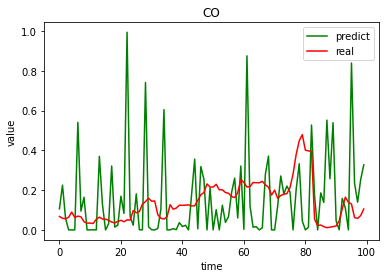

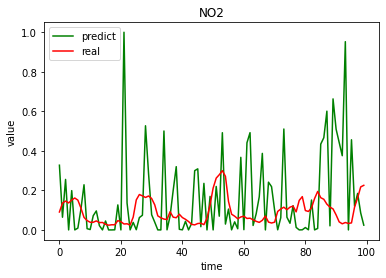

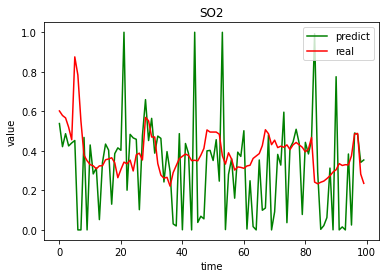

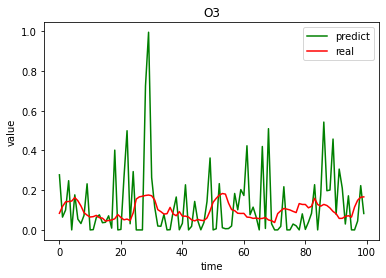

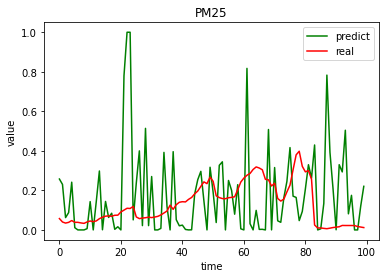

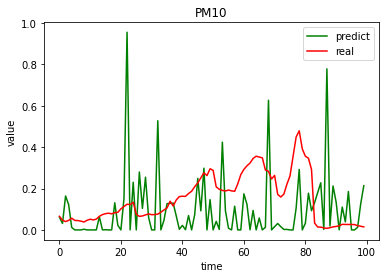

In [22]:
#%% 
if __name__ == "__main__":
    data = pd.read_csv('dataProcess.csv',index_col = 0)
    data = np.array(data)
    train_time = 504               #设置滑动窗口
    start = 10
    hour = 100   
    concept = data.shape[1]
    
    #data_train = data[240:600,:]   #20天做训练
    data_test = data[start:start+hour,:]     #3天做测试
    
    
    data_pre = np.zeros((data_test.shape[0],data_test.shape[1]))
    for i in range(start,start+hour):
        data_train = data[i:i+train_time,:]
        data_real = data[i+train_time-1,:]
        e,lmd,error_time = jayaTrain(data[i-1:i+train_time-1,:],data_train,1,concept,npop = 8)
        data_pre[i-data_pre.shape[0]] = fcm(e,lmd,data_real,1)

            
#    e,lmd = jayaTrain(data_train[0,:],data_train,240,6,npop = 8)
#    data_pre = fcm(e,lmd,data_test[0,:],50)
    print(errorLp(2,data_pre,data_test))
    drawPre("CO",data_pre[:,0],data_test[:,0],dataNum = data_test.shape[0])
    drawPre("NO2",data_pre[:,1],data_test[:,1],dataNum = data_test.shape[0])
    drawPre("SO2",data_pre[:,2],data_test[:,2],dataNum = data_test.shape[0])
    drawPre("O3",data_pre[:,3],data_test[:,3],dataNum = data_test.shape[0])
    drawPre("PM25",data_pre[:,4],data_test[:,4],dataNum = data_test.shape[0])
    drawPre("PM10",data_pre[:,5],data_test[:,5],dataNum = data_test.shape[0])